In [1]:
#importing data from CSV file into pandas dataframe
# Warning Libraries  
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Shape of the database 
application_data.shape

(307511, 122)

In [3]:
application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64



We can see that there are:</font>

    65 columns with dtype=float64</font>
    41 columns with dtype=int64</font>
    16 columns with dtype=object


In [4]:
# Get the count,size and unique values in each column of application data
application_data.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


In [5]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/len(data)*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=True)

In [6]:
#calculating meta-data for application_data
app_meta_data=meta_data(application_data)
app_meta_data

,Total,Percent,Unique,Data_Type
SK_ID_CURR,0,0.000000,307511,int64
HOUR_APPR_PROCESS_START,0,0.000000,24,int64
REG_REGION_NOT_WORK_REGION,0,0.000000,2,int64
LIVE_REGION_NOT_WORK_REGION,0,0.000000,2,int64
REG_CITY_NOT_LIVE_CITY,0,0.000000,2,int64
...,...,...,...,...
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
COMMONAREA_AVG,214865,69.872297,3181,float64


In [7]:
#Selected 50% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<50)].index)
application_data=application_data[cols_to_keep]
application_data.describe()

,SK_ID_CURR,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,...,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,EXT_SOURCE_3,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,265992.000000,265992.000000,246546.000000,159080.000000,157504.000000,157504.000000,157504.000000,154491.000000,154491.000000,154491.000000
mean,278180.518577,12.063419,0.050769,0.040659,0.078173,0.230454,0.179555,0.000335,0.000507,0.000595,...,1.899974,0.265474,0.510853,0.102547,0.977065,0.977735,0.977752,0.226282,0.225897,0.222315
std,102790.175348,3.265832,0.219526,0.197499,0.268444,0.421124,0.383817,0.018299,0.022518,0.024387,...,1.869295,0.794056,0.194844,0.107462,0.064575,0.059223,0.059897,0.144641,0.145067,0.143709
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.370650,0.041200,0.976700,0.976700,0.976700,0.166700,0.166700,0.166700
50%,278202.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.535276,0.068800,0.981600,0.981600,0.981600,0.166700,0.166700,0.166700
75%,367142.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.669057,0.127600,0.986600,0.986600,0.986600,0.333300,0.333300,0.333300
max,456255.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,261.000000,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Analyzing the columns with less null values

In [8]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(app_meta_data[(app_meta_data.Percent>0)&(app_meta_data.Percent<14)])
low_missing

,Total,Percent,Unique,Data_Type
DAYS_LAST_PHONE_CHANGE,1,0.000325,3773,float64
CNT_FAM_MEMBERS,2,0.000650,17,float64
AMT_ANNUITY,12,0.003902,13672,float64
AMT_GOODS_PRICE,278,0.090403,1002,float64
EXT_SOURCE_2,660,0.214626,119831,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021,9,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
NAME_TYPE_SUITE,1292,0.420148,7,object



Explanation for treatment of columns with low missing values

    AMT_REQ_CREDIT_BUREAU_HOUR
    AMT_REQ_CREDIT_BUREAU_DAY
    AMT_REQ_CREDIT_BUREAU_WEEK
    AMT_REQ_CREDIT_BUREAU_MON
    AMT_REQ_CREDIT_BUREAU_QRT
    AMT_REQ_CREDIT_BUREAU_YEAR

We can impute missing values in these columns above with 0s and assume that no enquiry was made during the time r resulted in null rows.

    NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.
    OBS_30_CNT_SOCIAL_CIRCLE & related fields.
    EXT_SOURCE_2
    AMT_GOODS_PRICE
    CNT_FAM_MEMBERS
    AMT_ANNUITY
    DAYS_LAST_PHONE_CHANGE

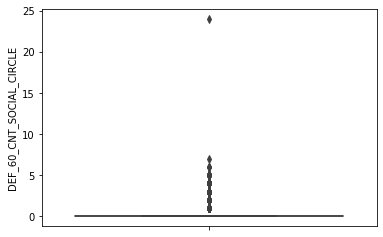

In [9]:
#Ploting Box plot to determine the outlier in DEF_60_CNT_SOCIAL_CIRCLE column
sns.boxplot(y=application_data["DEF_60_CNT_SOCIAL_CIRCLE"])

In [10]:
#Imputing with Median
application_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(inplace=True,value=application_data["DEF_60_CNT_SOCIAL_CIRCLE"].median)
print(application_data["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum())

0


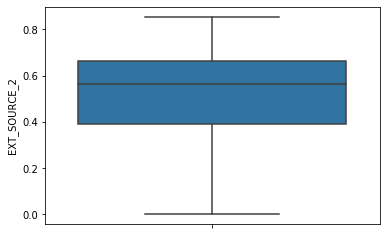

In [11]:
sns.boxplot(y=application_data["EXT_SOURCE_2"])

As there is no outlier we would be amputing it with Mean 

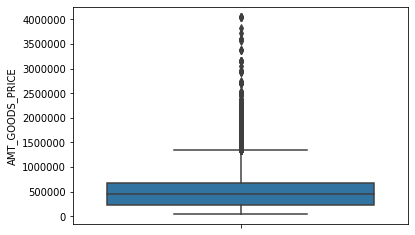

In [12]:
sns.boxplot(y=application_data.AMT_GOODS_PRICE)

In [13]:
#Imputing with Median
application_data["AMT_GOODS_PRICE"].fillna(inplace=True,value=application_data["AMT_GOODS_PRICE"].median)
print(application_data["AMT_GOODS_PRICE"].isnull().sum())

0


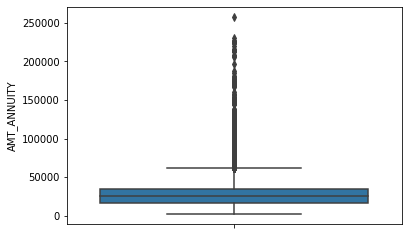

In [14]:
sns.boxplot(y=application_data.AMT_ANNUITY)

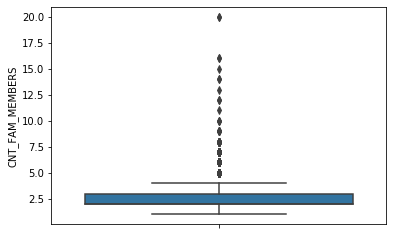

In [15]:
sns.boxplot(y=application_data.CNT_FAM_MEMBERS)


In [16]:
#Imputing with Median
application_data["CNT_FAM_MEMBERS"].fillna(inplace=True,value=application_data["CNT_FAM_MEMBERS"].median)
print(application_data["CNT_FAM_MEMBERS"].isnull().sum())

0


In [17]:
application_data.dtypes.value_counts()

int64      41
float64    24
object     16
dtype: int64

Now we will check the columns which can be used as flags in the further analysis

In [18]:
application_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMEN

All the columns with unique values as 2 can be used as flags. There are similar kind of columns in object type of column also. 

In [19]:
application_data.DAYS_LAST_PHONE_CHANGE

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [20]:
application_data.DAYS_LAST_PHONE_CHANGE=abs(application_data.DAYS_LAST_PHONE_CHANGE)
application_data.DAYS_LAST_PHONE_CHANGE

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [21]:
application_data.DAYS_BIRTH=abs(application_data.DAYS_BIRTH)
application_data.DAYS_BIRTH

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [22]:
application_data.DAYS_EMPLOYED=abs(application_data.DAYS_EMPLOYED)
application_data.DAYS_EMPLOYED


0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [23]:
application_data.DAYS_REGISTRATION=abs(application_data.DAYS_REGISTRATION)
application_data.DAYS_REGISTRATION

0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [24]:
application_data.DAYS_ID_PUBLISH=abs(application_data.DAYS_ID_PUBLISH)
application_data.DAYS_ID_PUBLISH

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [25]:


#columns to convert
cols_to_convert=list(app_meta_data[(app_meta_data.Unique==2)&(app_meta_data.Data_Type=="int64")].index)

#function to conver columns
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data

#calling the function for application_data
convert_data(application_data, cols_to_convert)
application_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
application_data.dtypes.value_counts()



object     48
float64    24
int64       9
dtype: int64

In [26]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

In [27]:
defaulters=application_data[application_data.TARGET==1]
nondefaulters=application_data[application_data.TARGET==0]

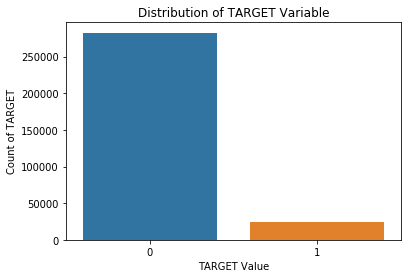

In [28]:
sns.countplot(application_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [29]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

In [30]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

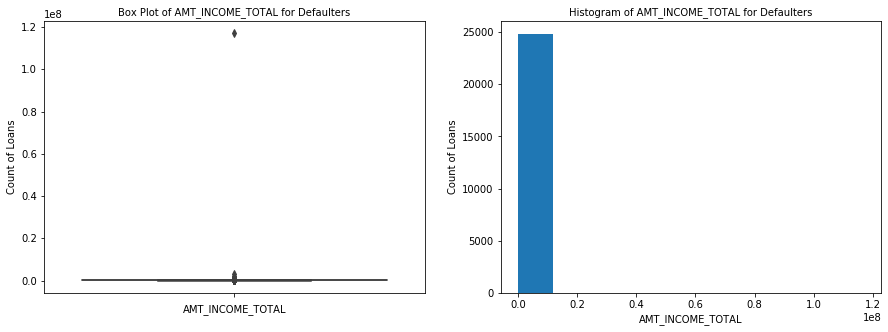

In [31]:
plot_boxhist('AMT_INCOME_TOTAL')

We can see that there are some outliers and the graph looks like this to accomodate those outliers.

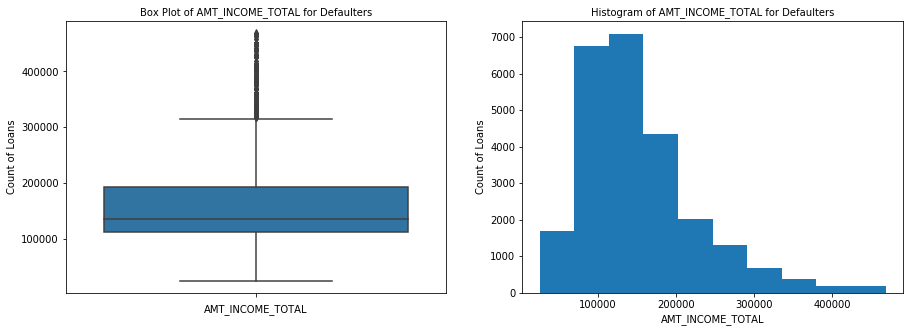

In [32]:
#Creating new dataset for analysis of main bulk region
application_data1=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=application_data1[application_data1.TARGET==1] 
nondefaulters=application_data1[application_data1.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

This tell us that most people with payment have incomes in the lower range between 100000 to 200000 which some on the higher end some on the lower

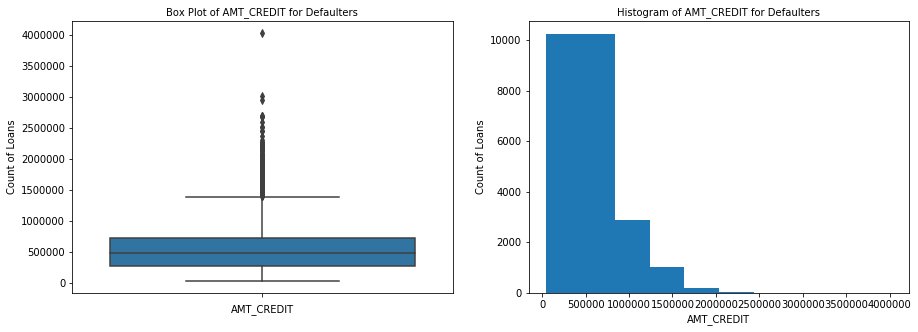

In [33]:


plot_boxhist('AMT_CREDIT')



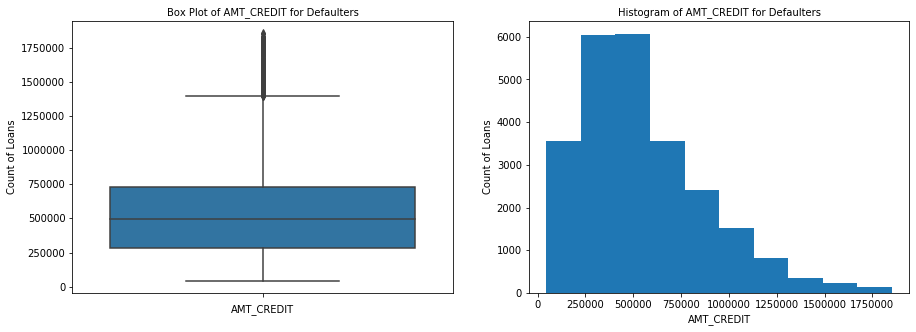

In [34]:
#Removing all entries above 99 percentile
application_data1=application_data[application_data.AMT_CREDIT<np.nanpercentile(application_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application_data1[application_data1.TARGET==1] 
nondefaulters=application_data1[application_data1.TARGET==0]

plot_boxhist('AMT_CREDIT')

we observe that the credit amount lies between 250000 to around 500000 for defaulters

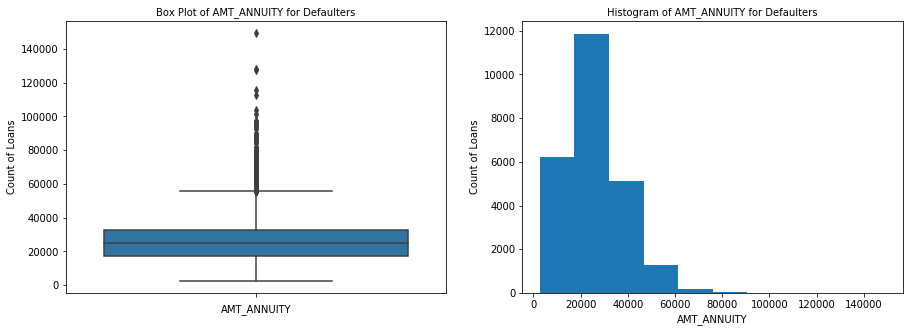

In [35]:
plot_boxhist('AMT_ANNUITY')

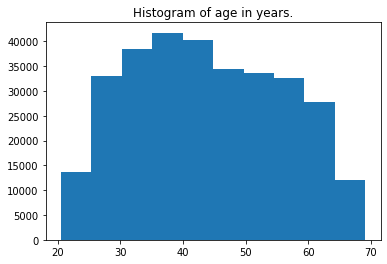

In [36]:
#Deriving new metric Age from Days Birth
application_data['AGE'] = application_data['DAYS_BIRTH'] / 365
plt.hist(application_data['AGE']);
plt.title('Histogram of age in years.');

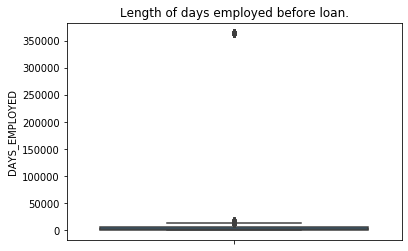

In [37]:


sns.boxplot(y=application_data['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');



In [38]:
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

There is an outlier here. The max value is 365243 days which is not practically possible. This might be an error and we can replace this value with null

In [39]:
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].replace(365243, np.nan)
application_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [40]:


#Deriving variable "Years Employed" from days employed
application_data['YEARS_EMPLOYED'] = (application_data['DAYS_EMPLOYED']/365)

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]



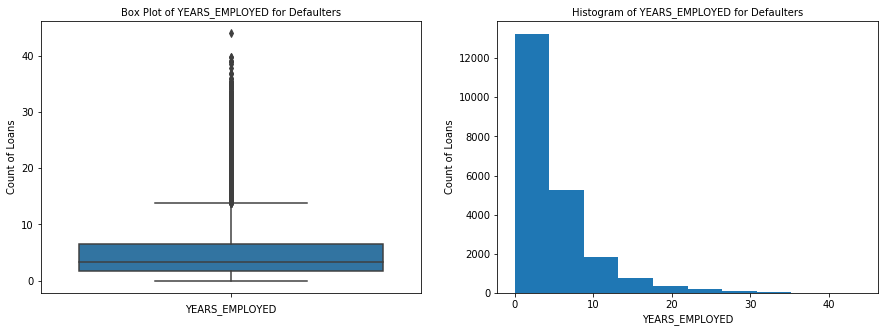

In [41]:
plot_boxhist('YEARS_EMPLOYED')

A large number of entries have 0 which means, a lot of people don't work.

In [42]:
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


Binning of Continuous Variables


In [43]:
application_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL  \
                                                               mean   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate    274688.372093   
                              Pensioner               203919.230769   
                              State servant           258847.826087   
                              Working                 226312.500000   
Higher education              Businessman             652500.000000   
                              Commercial associate    242283.998486   
                              Maternity leave         195000.000000   
                              Pensioner               171455.114974   
                              State servant           207116.161080   
                              Student                 231000.000000   
                              Unemployed              189000.000000   
                              Working                 194013.110125   
Incomplete higher             Commercial associate    206232.296029   
                              Pensioner               149437.155405   
                              State servant           173589.989610   
                              Student                 157500.000000   
                              Unemployed              126000.000000   
                              Working                 170659.490600   
Lower secondary               Commercial associate    168173.628261   
                              Pensioner               106468.010464   
                              State servant           143250.000000   
                              Working                 140070.652174   
Secondary / secondary special Commercial associate    181368.704601   
                              Maternity leave          58500.000000   
                              Pensioner               130863.482560   
                              State servant           159979.349061   
                              Student                 138681.818182   
                              Unemployed               70753.846154   
                              Working                 154261.801730   

                                                                       \
                                                       median   count   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                          
Academic degree               Commercial associate  247500.00      43   
                              Pensioner             155700.00      26   
                              State servant         225000.00      23   
                              Working               202500.00      72   
Higher education              Businessman           495000.00      10   
                              Commercial associate  202500.00   24025   
                              Maternity leave       135000.00       3   
                              Pensioner             148500.00    8188   
                              State servant         180000.00    8863   
                              Student               175500.00       6   
                              Unemployed            180000.00       6   
                              Working               174134.25   33762   
Incomplete higher             Commercial associate  180000.00    3400   
                              Pensioner             135000.00     518   
                              State servant         157500.00     770   
                              Student               157500.00       1   
                              Unemployed             63000.00       3   
                              Working               157500.00    5585   
Lower secondary               Commercial associate  144000.00     460   
                              Pensioner              90000.00    1529   
                              State servant         119250.00     102   
                          

In [44]:


application_data.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})



YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                7.874795  6.280822      10  14.917808  47.498630
Commercial associate       5.833627  4.147945   71617  48.071233  39.780822
Maternity leave            7.224110  8.273973       5  10.306849  39.350685
Pensioner                 13.550137  7.673973      10  35.246575  60.413699
State servant              9.454441  7.205479   21703  48.172603  40.693151
Student                    6.835160  5.069863      18  21.931507  36.663014
Unemployed                      NaN       NaN       0        NaN  45.860274
Working                    6.446909  4.427397  158774  49.073973  39.876712

In [45]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])


Analysis of Continuous variables for TARGET=1 and TARGET=0


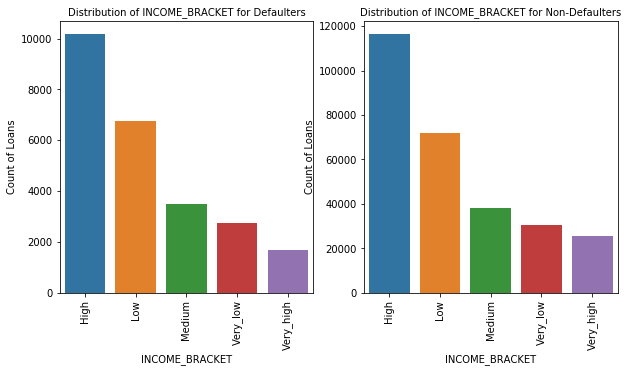

In [46]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

In [47]:
defaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

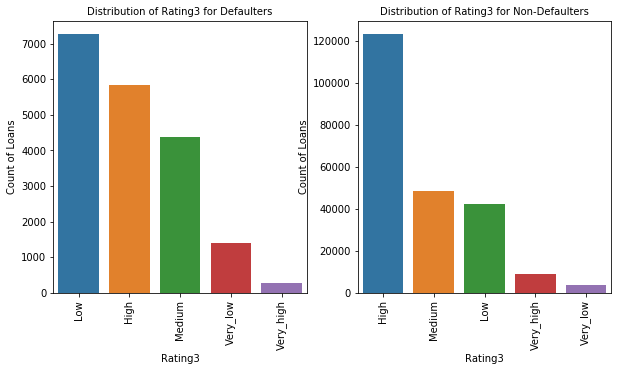

In [48]:
plot_charts('Rating3', label_rotation=True,horizontal_layout=True)

A large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

In [49]:
age_data = application_data.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = application_data.loc[:,'DAYS_BIRTH']/ 365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [50]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


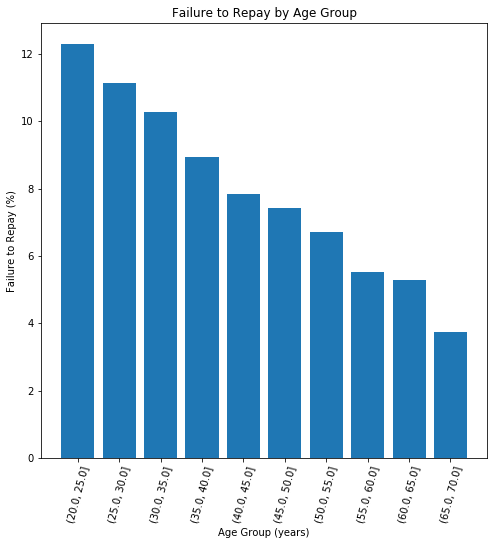

In [51]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');



    Maximum Failure to Repay is in Age Group 20-25



In [52]:
application_data.EXT_SOURCE_2

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [53]:


defaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])



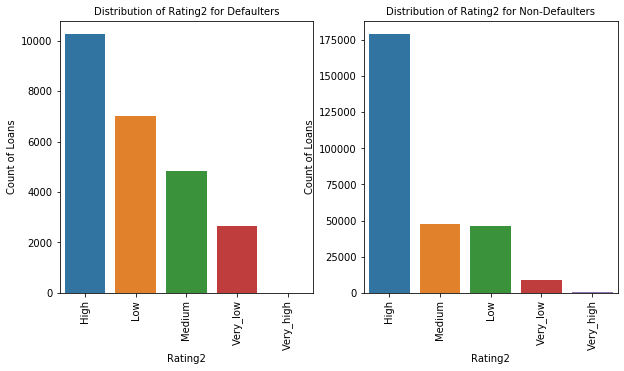

In [54]:
plot_charts('Rating2', label_rotation=True,horizontal_layout=True)



A large number of defaulters have Low rating, while a large number of non-defaulters have a high rating.


In [55]:
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

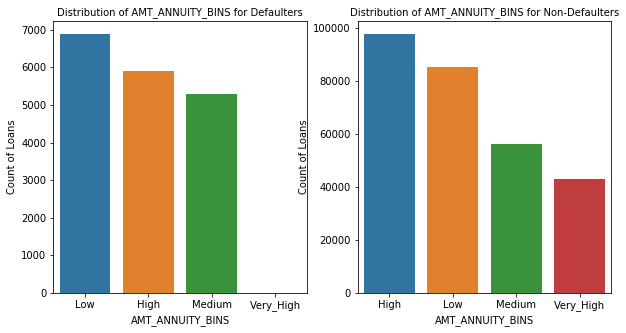

In [56]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

In [57]:
defaulters=application_data[application_data.TARGET==1]
nondefaulters=application_data[application_data.TARGET==0]

In [58]:
100*application_data.TARGET.value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

This is not a balanced data.

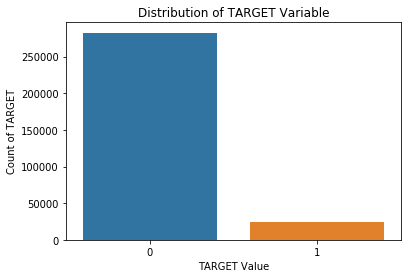

In [59]:
sns.countplot(application_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

Univarate Analysis for Categorical Variables

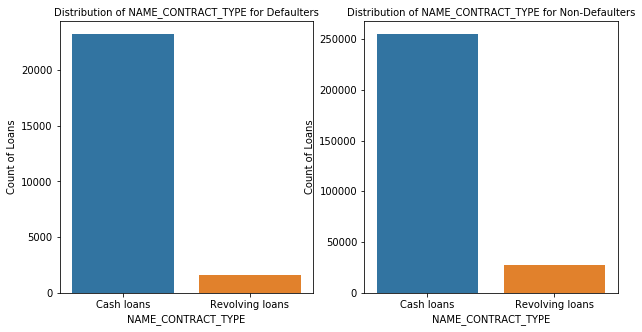

In [60]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

The Cash loans are popular among both defaulters and non defaulters

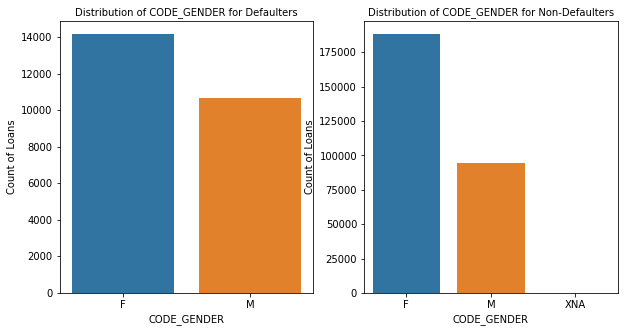

In [61]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

We see that number of females taking loans is higher than males

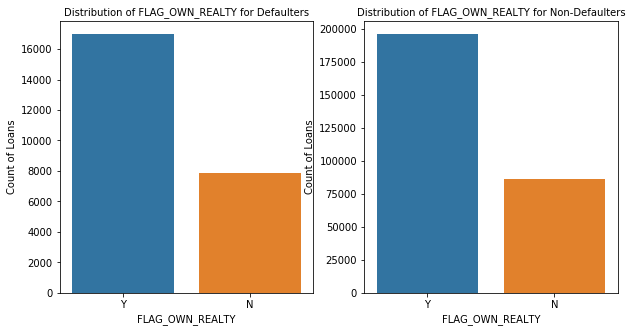

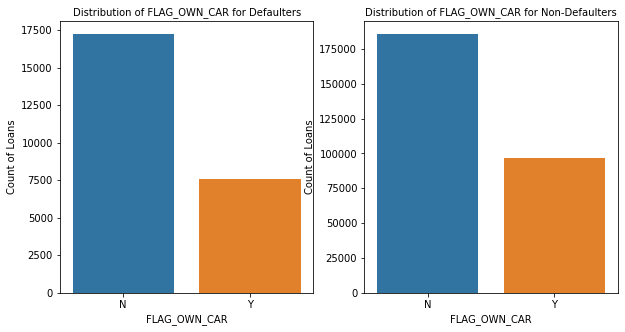

In [62]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)



We observe that the number of most people applying for loan do not own a car.

    We also observe that the ratio of people who own a car is higher for non-defaulters



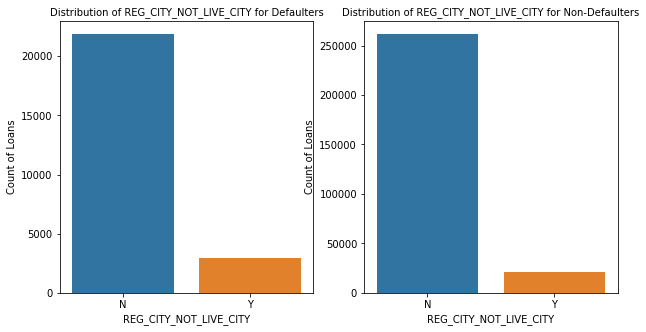

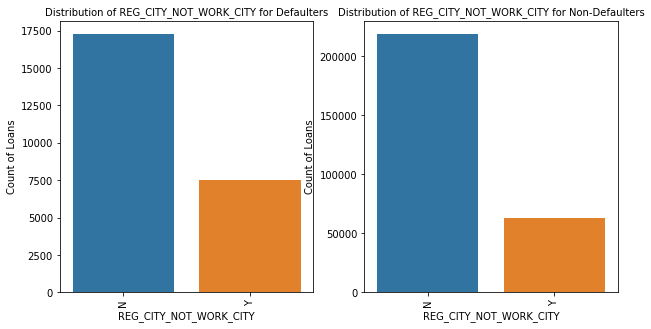

In [63]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)



We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

    It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties.



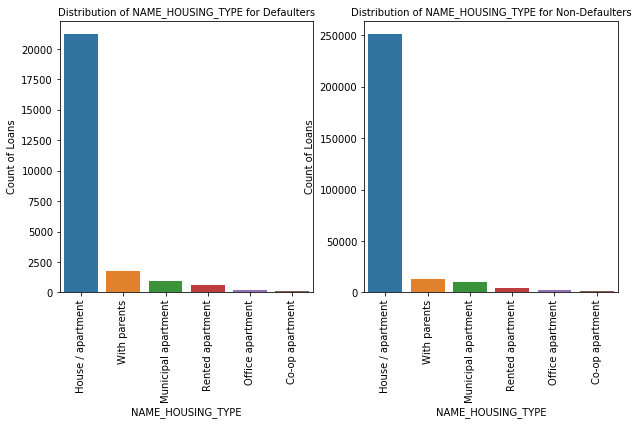

In [64]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)



    Observation:

        1)Most people live in a House/Apartment
        2)Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.



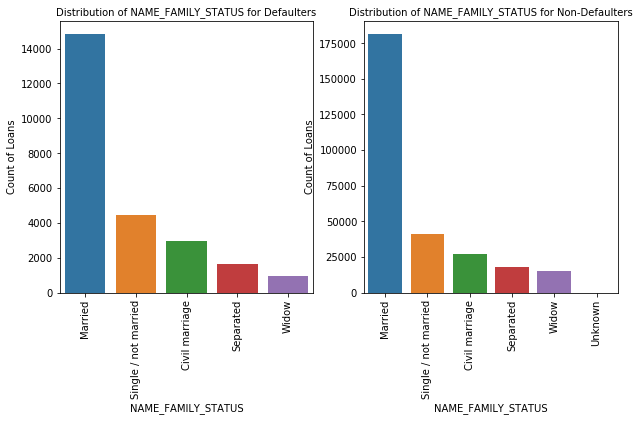

In [65]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

We observe that more married people are tend to have loan as compared to others.


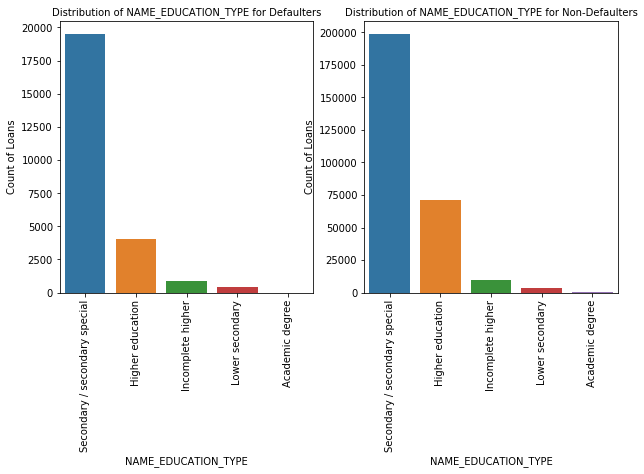

In [66]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)



    While the category with highest count remains same.

        This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.
        People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.



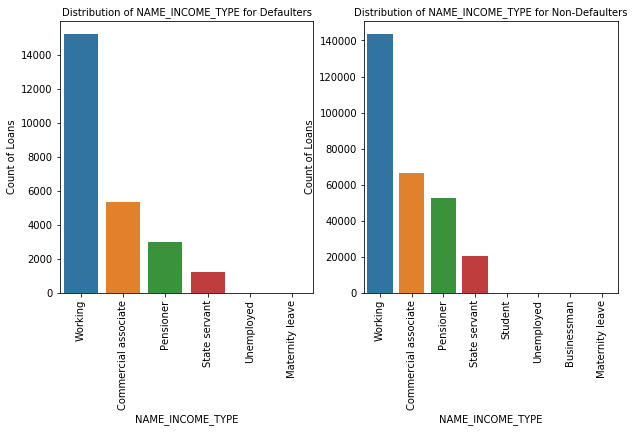

In [67]:


plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)



Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.

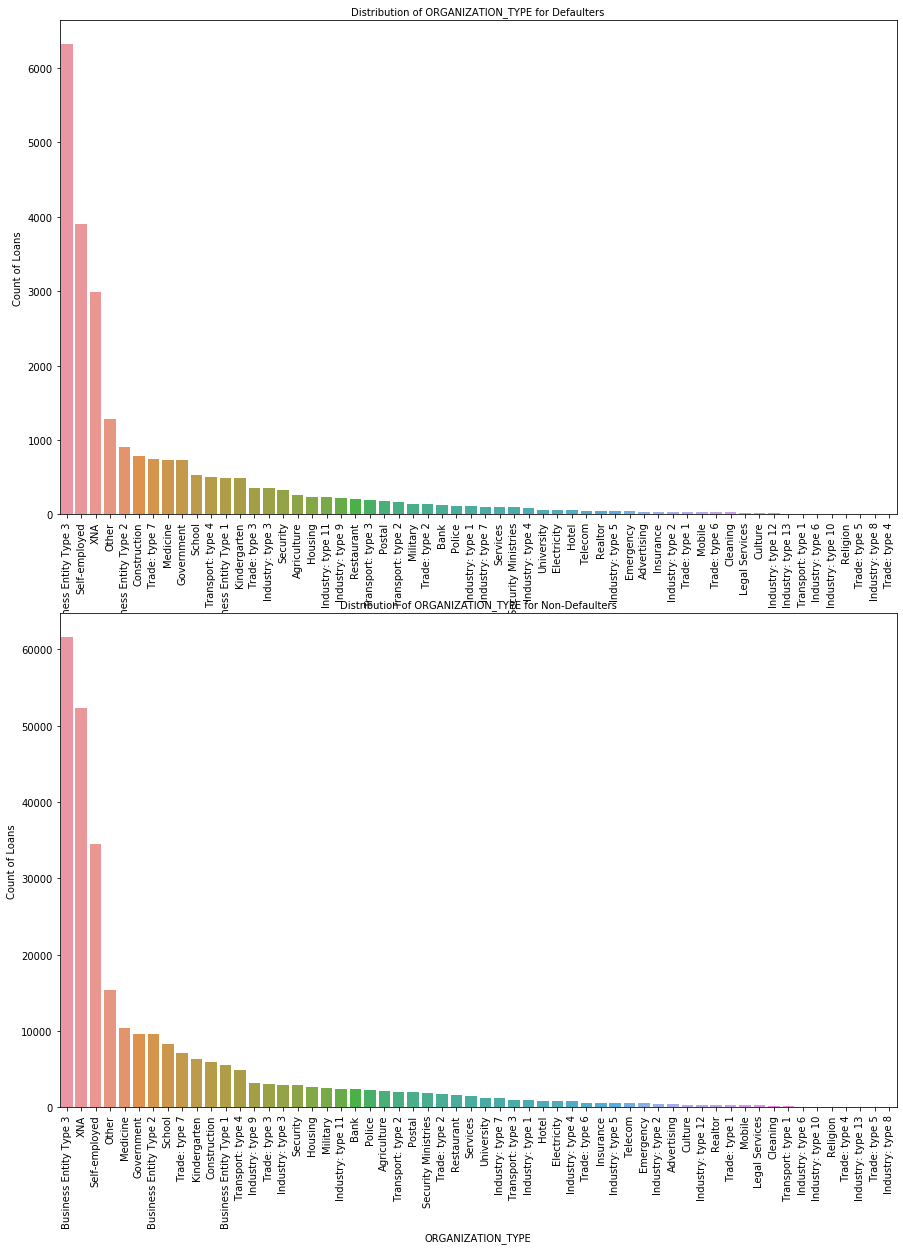

In [68]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

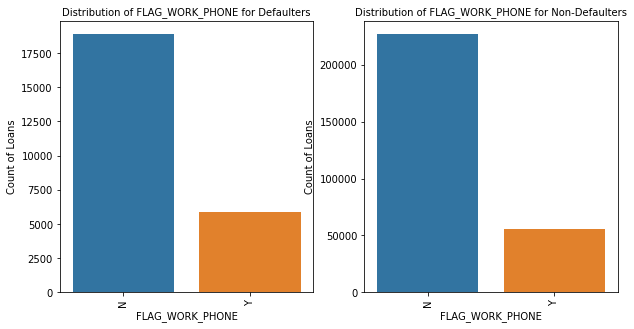

In [69]:
plot_charts('FLAG_WORK_PHONE', label_rotation=True,horizontal_layout=True)

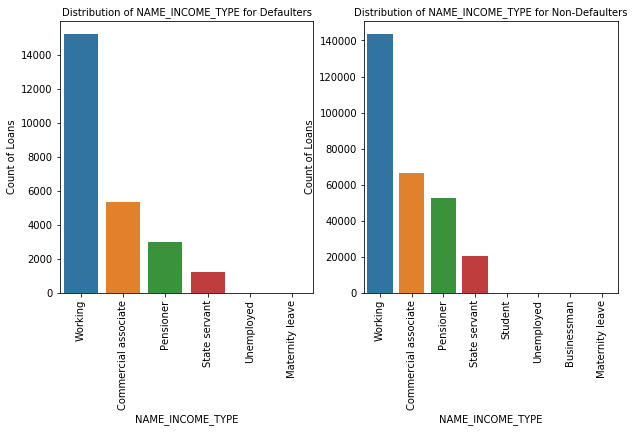

In [70]:


plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)



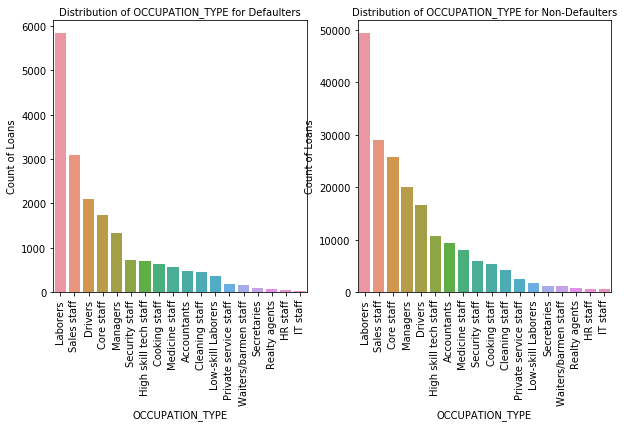

In [71]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

In [72]:

#MultiVariate Analysis of Variables


cols=[ 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_3,1.000,0.078,0.041,0.065,0.078,-0.015,0.086,-0.010,-0.020,-0.046,0.008,0.011,0.128,0.085,0.172
EXT_SOURCE_2,0.078,1.000,0.116,0.208,0.121,0.007,0.070,0.170,-0.012,0.135,-0.249,-0.251,0.060,0.094,0.109
AMT_ANNUITY,0.041,0.116,1.000,0.080,0.752,0.046,-0.034,0.072,0.031,0.031,-0.089,-0.074,0.017,0.049,0.014
DAYS_LAST_PHONE_CHANGE,0.065,0.208,0.080,1.000,0.111,0.002,0.072,0.055,-0.012,0.023,-0.019,-0.018,0.124,0.170,0.111
AMT_CREDIT,0.078,0.121,0.752,0.111,1.000,0.038,0.026,0.069,-0.002,0.032,-0.071,-0.059,0.052,0.106,0.135
AMT_INCOME_TOTAL,-0.015,0.007,0.046,0.002,0.038,1.000,-0.000,0.009,0.005,0.014,-0.023,-0.021,0.004,0.000,-0.003
DAYS_REGISTRATION,0.086,0.070,-0.034,0.072,0.026,-0.000,1.000,0.056,-0.149,0.033,-0.100,-0.104,0.097,0.137,0.289
REGION_POPULATION_RELATIVE,-0.010,0.170,0.072,0.055,0.069,0.009,0.056,1.000,-0.032,0.143,-0.447,-0.443,0.016,0.016,0.048
CNT_CHILDREN,-0.020,-0.012,0.031,-0.012,-0.002,0.005,-0.149,-0.032,1.000,-0.024,0.043,0.041,0.032,-0.033,-0.259
HOUR_APPR_PROCESS_START,-0.046,0.135,0.031,0.023,0.032,0.014,0.033,0.143,-0.024,1.000,-0.276,-0.294,-0.022,-0.000,-0.062


In [73]:
defaulters_correlation.head(10).index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [74]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH                1.000000
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT      0.956637
AMT_ANNUITY                  AMT_CREDIT                0.752195
DAYS_EMPLOYED                DAYS_BIRTH                0.307018
DAYS_REGISTRATION            DAYS_BIRTH                0.289114
DAYS_ID_PUBLISH              DAYS_BIRTH                0.252863
EXT_SOURCE_2                 DAYS_LAST_PHONE_CHANGE    0.207900
EXT_SOURCE_3                 DAYS_BIRTH                0.171621
DAYS_EMPLOYED                DAYS_LAST_PHONE_CHANGE    0.169963
REGION_POPULATION_RELATIVE   EXT_SOURCE_2              0.169751
dtype: float64

In [75]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

REGION_RATING_CLIENT_W_CITY  DAYS_REGISTRATION             -0.100285
REGION_RATING_CLIENT         DAYS_REGISTRATION             -0.103855
CNT_CHILDREN                 DAYS_REGISTRATION             -0.149154
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.248859
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.250519
DAYS_BIRTH                   CNT_CHILDREN                  -0.259109
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.275703
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.293908
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.443236
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.446977
dtype: float64

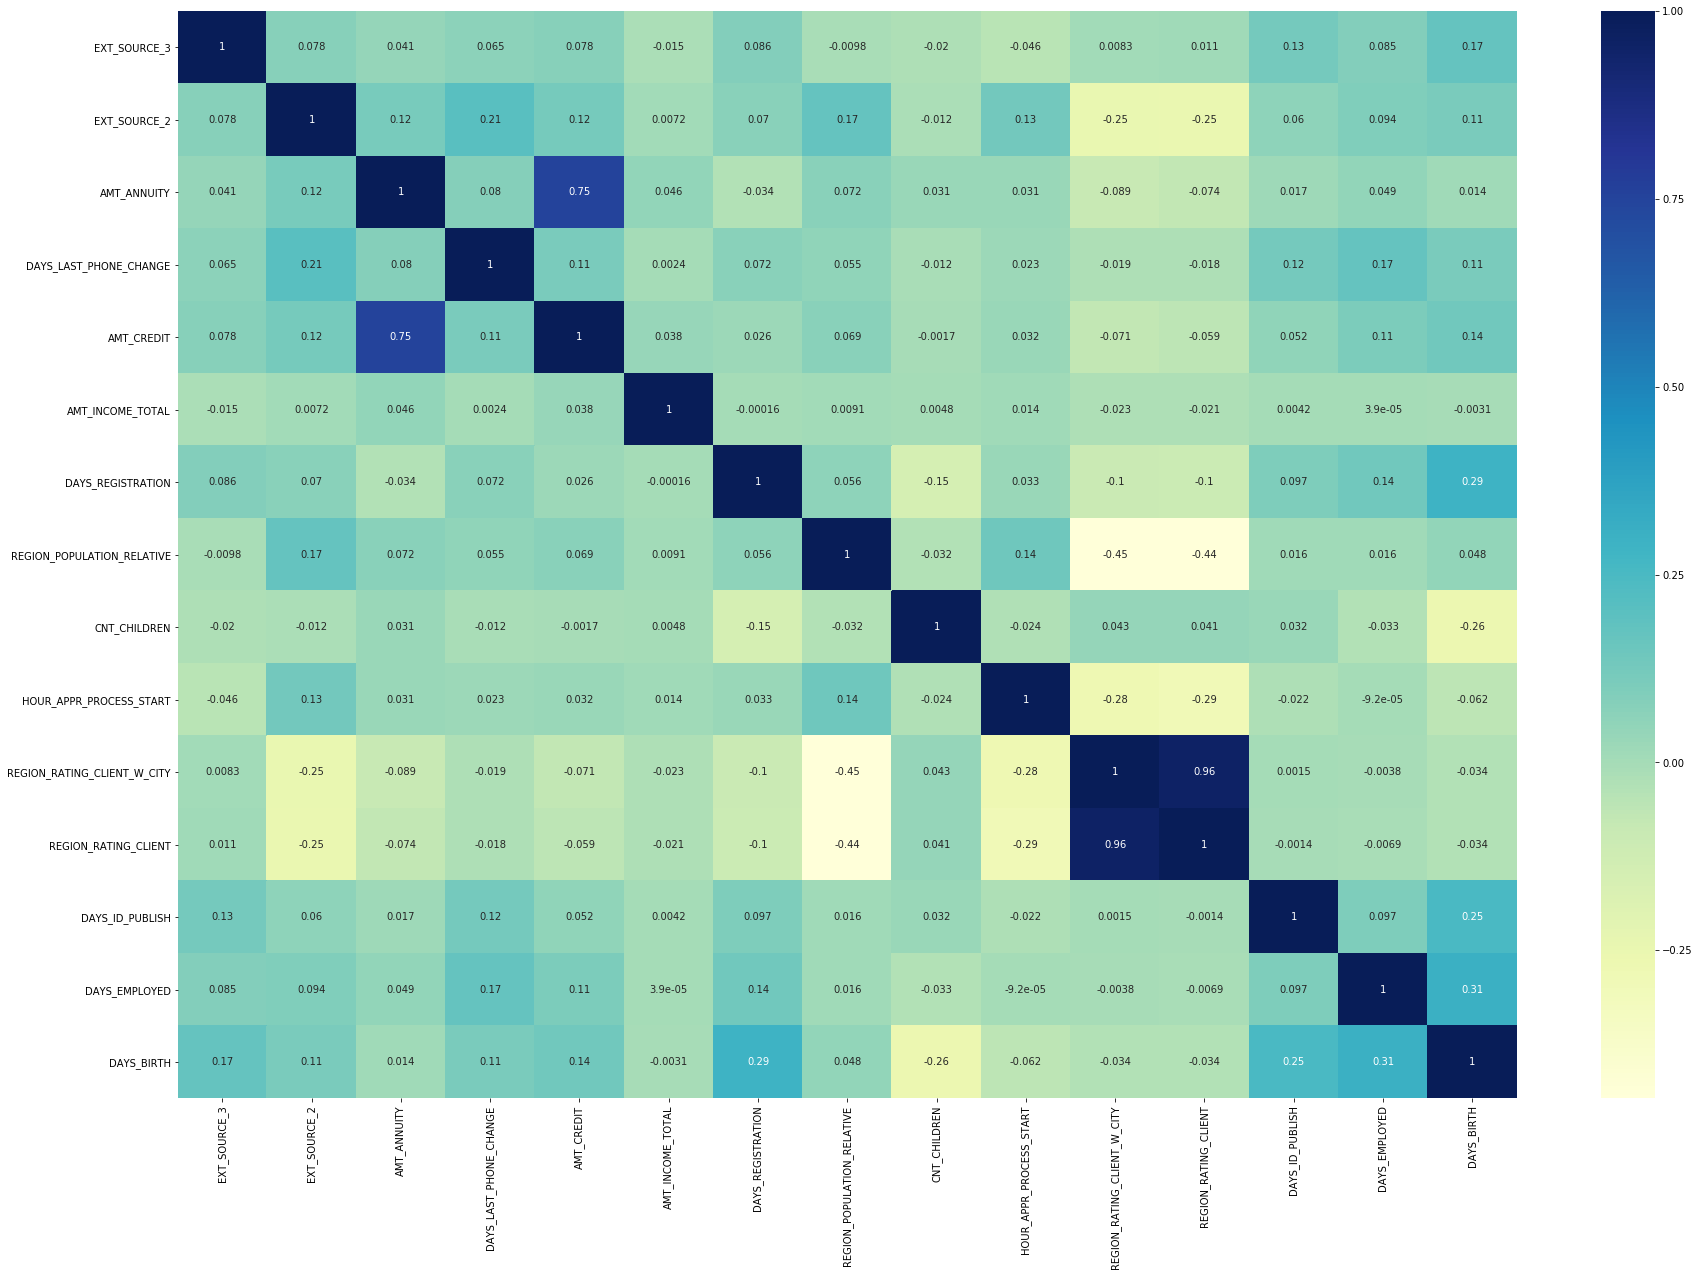

In [76]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
ax=sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Most positive correlations

    AMT_CREDIT - AMT_GOODS_PRICE
    REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
    CNT_CHILDREN - CNT_FAM_MEMBERS
    AMT_CREDIT - AMT_ANNUITY
    AMT_GOODS_PRICE - AMT_ANNUITY

Most negative correlations

    HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
    REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
    REGION_POPULATION_RELATIVE - REGION_RATING_CLIENT
    REGION_RATING_CLIENT_W_CITY - REGION_POPULATION_RELATIVE
    EXT_SOURCE_2 - REGION_RATING_CLIENT



In [77]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_3,1.000,0.085,0.028,0.067,0.036,-0.072,0.103,-0.012,-0.042,-0.045,-0.003,-0.004,0.125,0.121,0.197
EXT_SOURCE_2,0.085,1.000,0.127,0.188,0.129,0.140,0.053,0.198,-0.015,0.157,-0.286,-0.292,0.042,0.082,0.078
AMT_ANNUITY,0.028,0.127,1.000,0.062,0.771,0.419,-0.039,0.121,0.021,0.054,-0.145,-0.132,-0.014,0.052,-0.012
DAYS_LAST_PHONE_CHANGE,0.067,0.188,0.062,1.000,0.070,0.041,0.054,0.041,0.009,0.013,-0.023,-0.023,0.083,0.136,0.077
AMT_CREDIT,0.036,0.129,0.771,0.070,1.000,0.343,-0.013,0.101,0.003,0.054,-0.112,-0.103,0.001,0.088,0.047
AMT_INCOME_TOTAL,-0.072,0.140,0.419,0.041,0.343,1.000,-0.065,0.168,0.027,0.077,-0.200,-0.187,-0.023,0.030,-0.063
DAYS_REGISTRATION,0.103,0.053,-0.039,0.054,-0.013,-0.065,1.000,0.052,-0.186,0.008,-0.069,-0.076,0.100,0.172,0.333
REGION_POPULATION_RELATIVE,-0.012,0.198,0.121,0.041,0.101,0.168,0.052,1.000,-0.024,0.173,-0.537,-0.539,0.001,-0.009,0.025
CNT_CHILDREN,-0.042,-0.015,0.021,0.009,0.003,0.027,-0.186,-0.024,1.000,-0.005,0.022,0.023,0.029,-0.063,-0.337
HOUR_APPR_PROCESS_START,-0.045,0.157,0.054,0.013,0.054,0.077,0.008,0.173,-0.005,1.000,-0.263,-0.284,-0.034,-0.022,-0.096


In [78]:
nondefaulters_correlation.head(10).index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [79]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH            DAYS_BIRTH                     1.000000
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.950149
AMT_ANNUITY           AMT_CREDIT                     0.771309
                      AMT_INCOME_TOTAL               0.418953
DAYS_EMPLOYED         DAYS_BIRTH                     0.352662
AMT_CREDIT            AMT_INCOME_TOTAL               0.342799
DAYS_REGISTRATION     DAYS_BIRTH                     0.333151
DAYS_BIRTH            DAYS_ID_PUBLISH                0.271314
EXT_SOURCE_2          REGION_POPULATION_RELATIVE     0.198493
EXT_SOURCE_3          DAYS_BIRTH                     0.197287
dtype: float64

In [80]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_REGISTRATION           CNT_CHILDREN                  -0.185792
REGION_RATING_CLIENT        AMT_INCOME_TOTAL              -0.186573
AMT_INCOME_TOTAL            REGION_RATING_CLIENT_W_CITY   -0.200466
HOUR_APPR_PROCESS_START     REGION_RATING_CLIENT_W_CITY   -0.262874
REGION_RATING_CLIENT        HOUR_APPR_PROCESS_START       -0.284060
EXT_SOURCE_2                REGION_RATING_CLIENT_W_CITY   -0.286337
                            REGION_RATING_CLIENT          -0.291624
DAYS_BIRTH                  CNT_CHILDREN                  -0.336966
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY   -0.537301
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE    -0.539005
dtype: float64

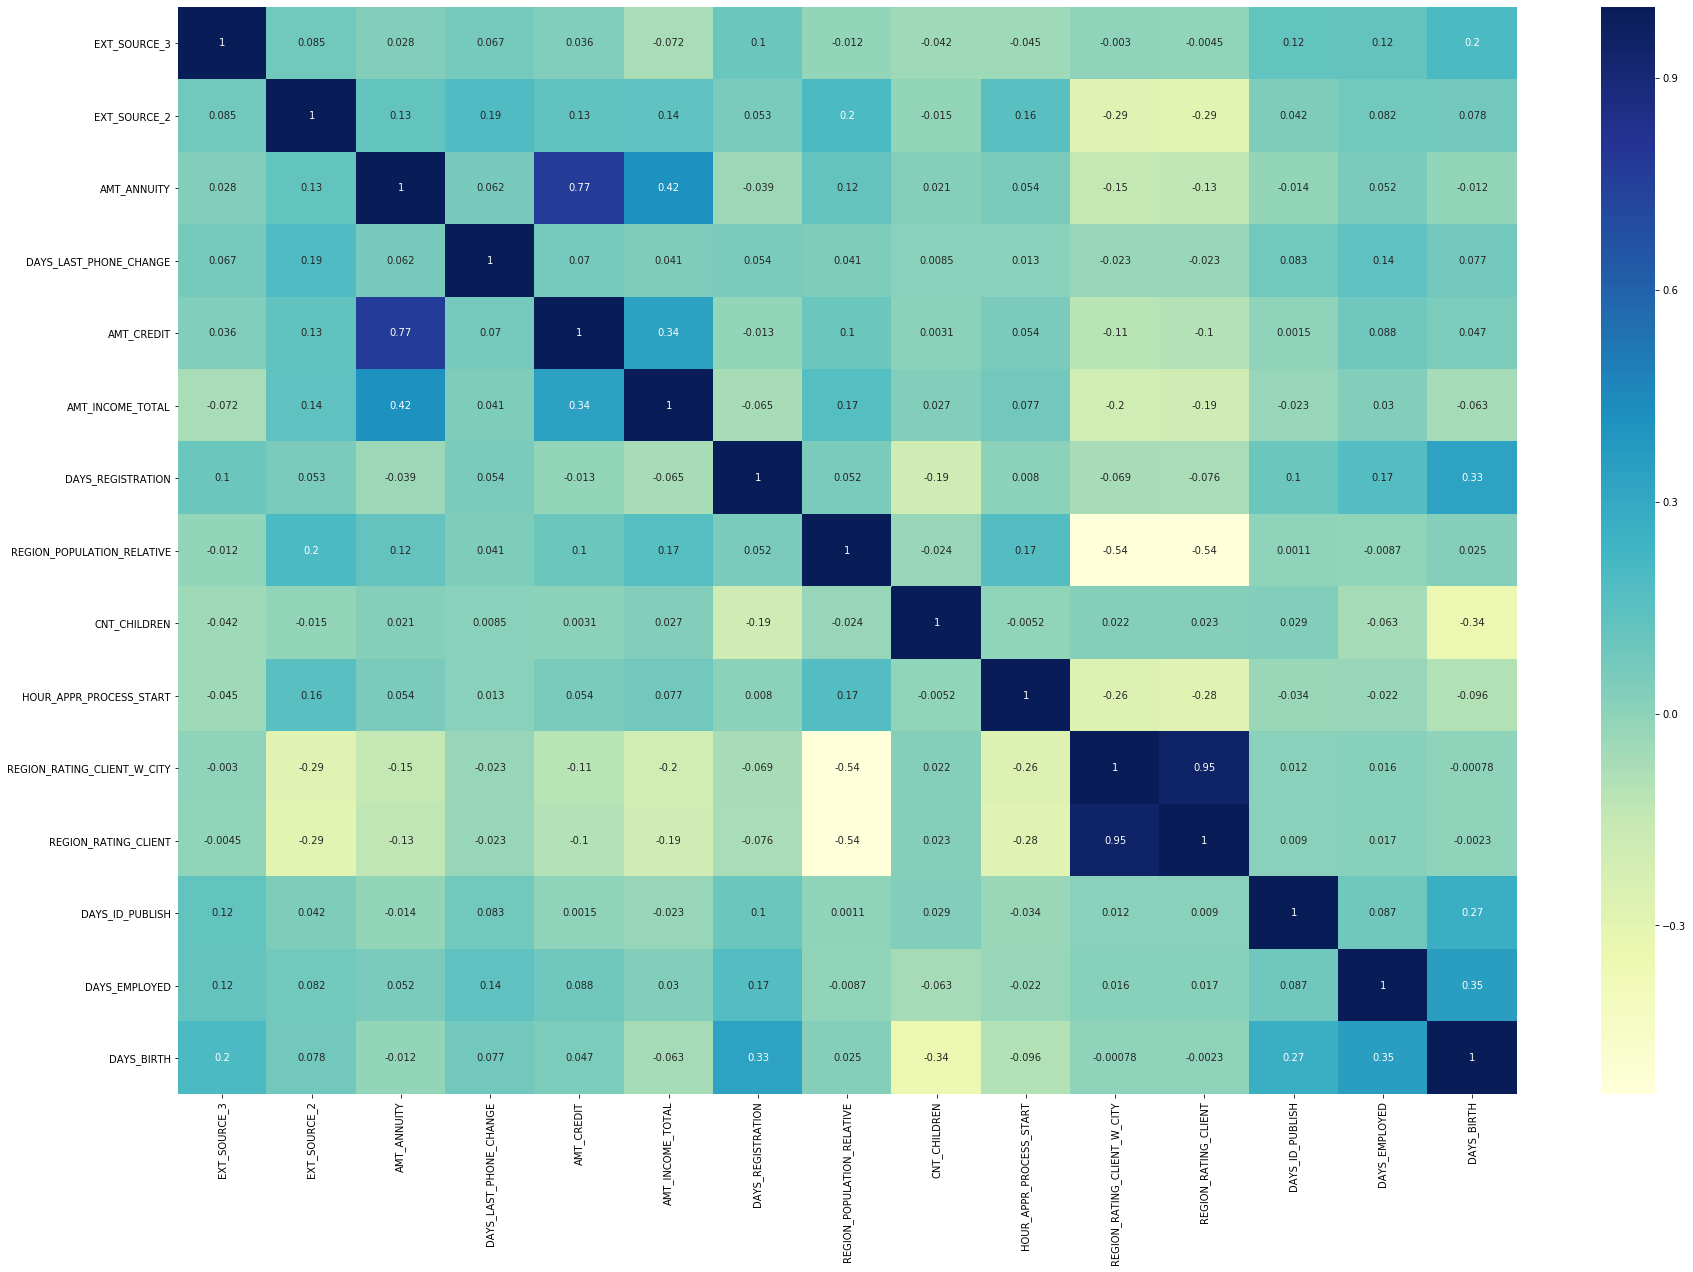

In [81]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
ax=sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Most positive correlations

AMT_CREDIT - AMT_GOODS_PRICE

REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT

CNT_CHILDREN - CNT_FAM_MEMBERS

AMT_CREDIT - AMT_ANNUITY

AMT_GOODS_PRICE - AMT_ANNUITY

Analysis of Previous Application

In [82]:
previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
previous_data.shape

(1670214, 37)



**This dataset for application data has:**

    **1670214 rows**
    **37 columns*

In [84]:
application_data.dtypes.value_counts()

object     48
float64    27
int64       8
dtype: int64



We can see that there are:</font>

    65 columns with dtype=float64</font>
    41 columns with dtype=int64</font>
    16 columns with dtype=object


In [85]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [86]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [87]:
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

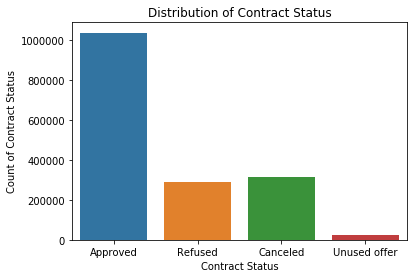

In [88]:
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


Identifying missing values and filtering out columns with high missing values


In [89]:
prev_meta_data=meta_data(previous_data)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,SK_ID_PREV,0,0.0,1670214,int64
1,NAME_YIELD_GROUP,0,0.0,5,object
2,NAME_SELLER_INDUSTRY,0,0.0,11,object
3,SELLERPLACE_AREA,0,0.0,2097,int64
4,CHANNEL_TYPE,0,0.0,8,object
5,NAME_PRODUCT_TYPE,0,0.0,3,object
6,NAME_PORTFOLIO,0,0.0,5,object
7,NAME_GOODS_CATEGORY,0,0.0,28,object
8,NAME_CLIENT_TYPE,0,0.0,4,object
9,CODE_REJECT_REASON,0,0.0,9,object


In [90]:
#dropping columns with more than 50% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<50)].index)
previous_data=previous_data[cols_to_keep]
previous_data.describe()

,SK_ID_PREV,SELLERPLACE_AREA,DAYS_DECISION,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,SK_ID_CURR,AMT_CREDIT,CNT_PAYMENT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.297984e+06,1.297979e+06,1.284699e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,3.139511e+02,-8.806797e+02,1.752339e+05,9.964675e-01,1.248418e+01,2.783572e+05,1.961140e+05,1.605408e+01,1.595512e+04,2.278473e+05,76582.403064,33767.774054,13826.269337,342209.855039,0.332570,81992.343838
std,5.325980e+05,7.127443e+03,7.790997e+02,2.927798e+05,5.932963e-02,3.334028e+00,1.028148e+05,3.185746e+05,1.456729e+01,1.478214e+04,3.153966e+05,149647.415123,106857.034789,72444.869708,88916.115834,0.471134,153303.516729
min,1.000001e+06,-1.000000e+00,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2889.000000,-2801.000000,-2892.000000,-2922.000000,0.000000,-2874.000000
25%,1.461857e+06,-1.000000e+00,-1.300000e+03,1.872000e+04,1.000000e+00,1.000000e+01,1.893290e+05,2.416050e+04,6.000000e+00,6.321780e+03,5.084100e+04,-1314.000000,-1242.000000,-1628.000000,365243.000000,0.000000,-1270.000000
50%,1.923110e+06,3.000000e+00,-5.810000e+02,7.104600e+04,1.000000e+00,1.200000e+01,2.787145e+05,8.054100e+04,1.200000e+01,1.125000e+04,1.123200e+05,-537.000000,-361.000000,-831.000000,365243.000000,0.000000,-499.000000
75%,2.384280e+06,8.200000e+01,-2.800000e+02,1.803600e+05,1.000000e+00,1.500000e+01,3.675140e+05,2.164185e+05,2.400000e+01,2.065842e+04,2.340000e+05,-74.000000,129.000000,-411.000000,365243.000000,1.000000,-44.000000
max,2.845382e+06,4.000000e+06,-1.000000e+00,6.905160e+06,1.000000e+00,2.300000e+01,4.562550e+05,6.905160e+06,8.400000e+01,4.180581e+05,6.905160e+06,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,365243.000000


In [91]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<14)])
low_missing

,Total,Percent,Unique,Data_Type
AMT_CREDIT,1,0.000060,86803,float64
PRODUCT_COMBINATION,346,0.020716,17,object


In [92]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']

In [93]:
def convert_data(previous_data, cols_to_convert):
    for y in cols_to_convert:
        previous_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return previous_data
convert_data(previous_data, cols_to_convert)
previous_data.dtypes.value_counts()

object     18
float64    10
int64       5
dtype: int64

In [94]:
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']
unused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [95]:
percentage_approved=(len(approved)*100)/len(previous_data)
percentage_refused=(len(refused)*100)/len(previous_data)
percentage_canceled=(len(canceled)*100)/len(previous_data)
percentage_unused=(len(unused)*100)/len(previous_data)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.07 %
The Percentage of people whose loans have been Refused is: 17.4 %
The Percentage of people whose loans have been Canceled is: 18.94 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [96]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [97]:
previous_data.select_dtypes('object').columns

Index(['NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE',
       'NAME_PRODUCT_TYPE', 'NAME_PORTFOLIO', 'NAME_GOODS_CATEGORY',
       'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NFLAG_LAST_APPL_IN_DAY',
       'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CONTRACT_TYPE', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'NAME_TYPE_SUITE'],
      dtype='object')

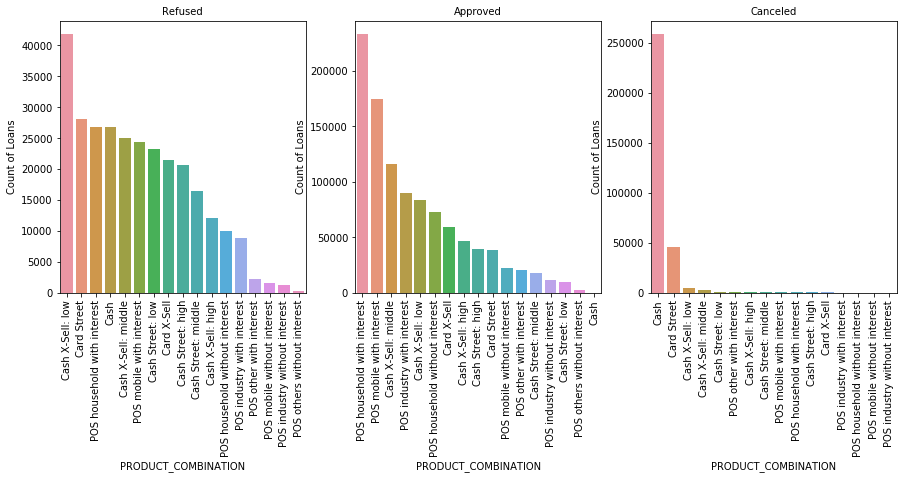

In [98]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)



    We observe most number of loans were approved for POS household with interest.
    Most number of refused loans were of Cash X-Sell: Low Product combination
    Most Canceled loans were Cash loans



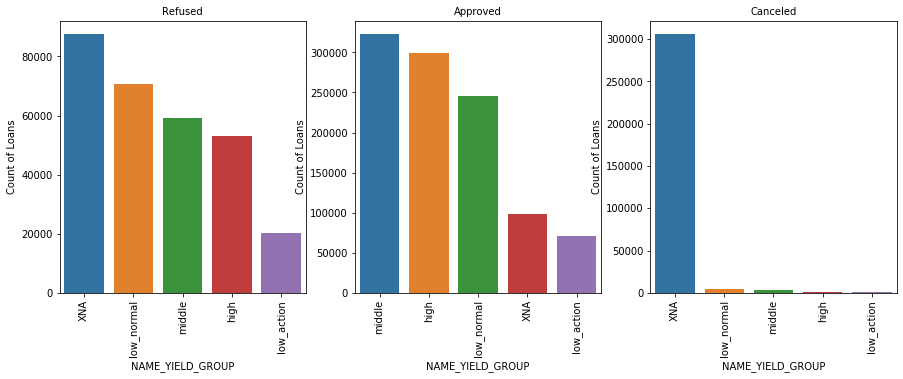

In [99]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)



    Most approved loans were from Middle Yield Goup
    Most refused loans were from Yield Goups Not specified



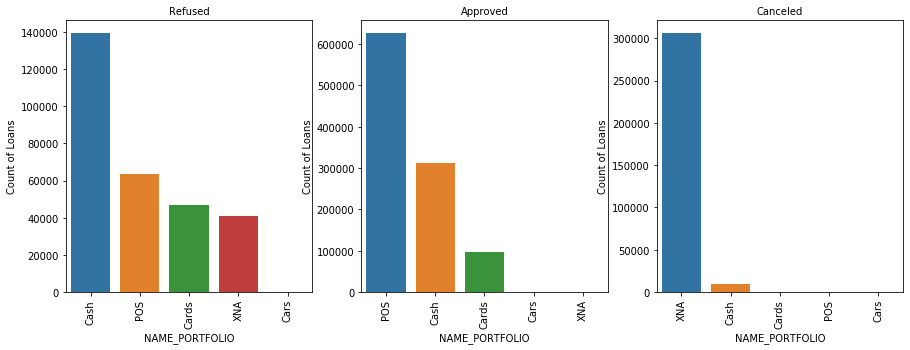

In [100]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)



    Most approved loans were POS
    Most refused loans were Cash



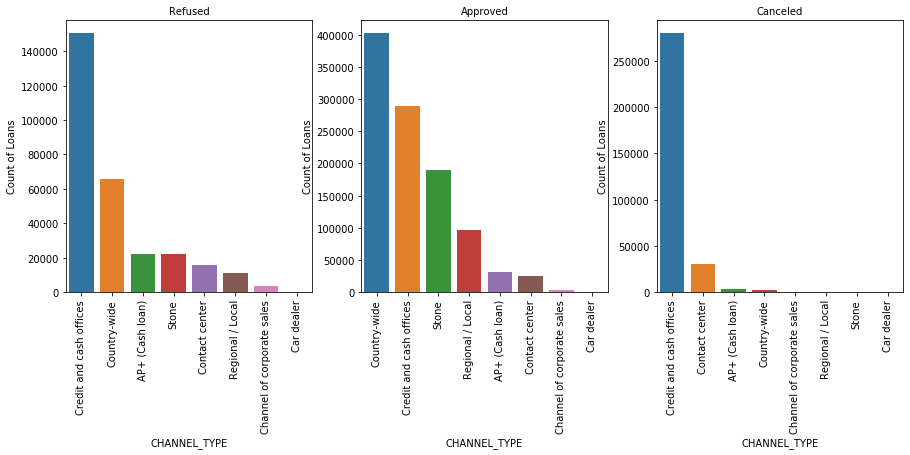

In [101]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)



    Most approved loans were from Country-wide Channel
    Most refused loans were from Credit and Cash Offices Channel



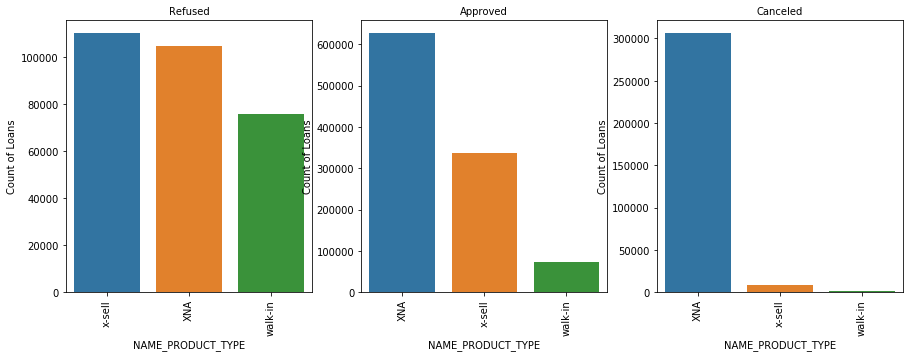

In [102]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

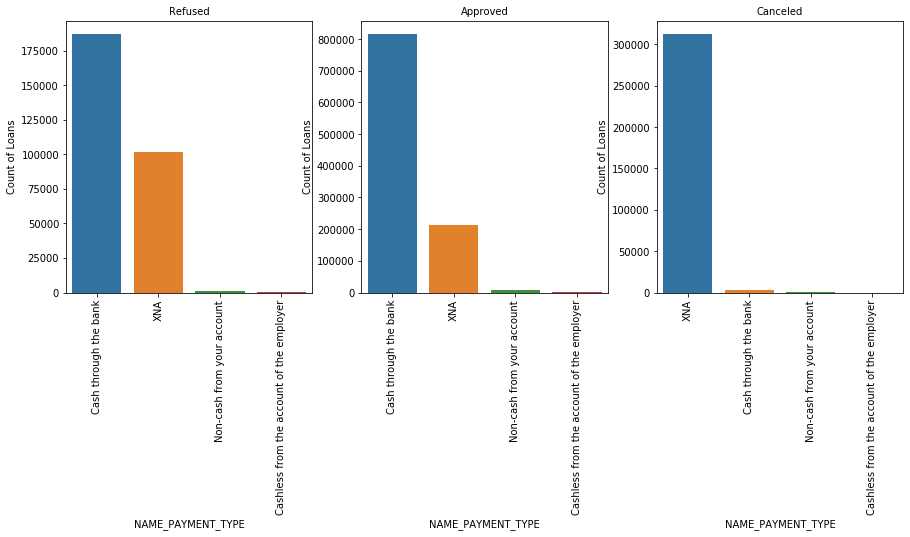

In [103]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

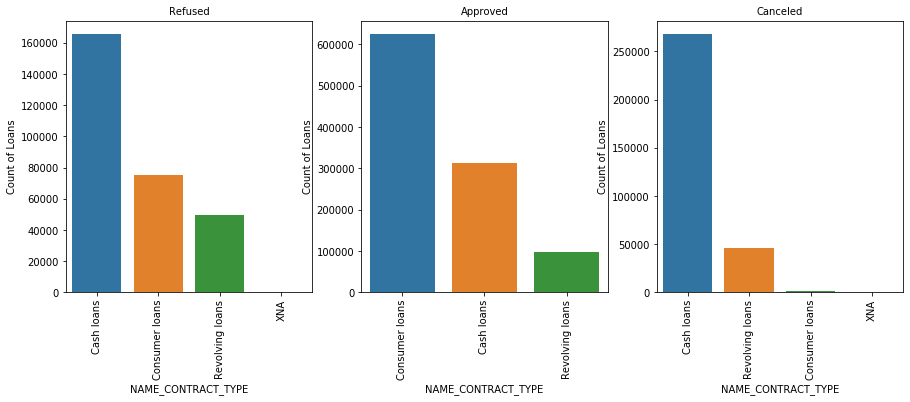

In [104]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

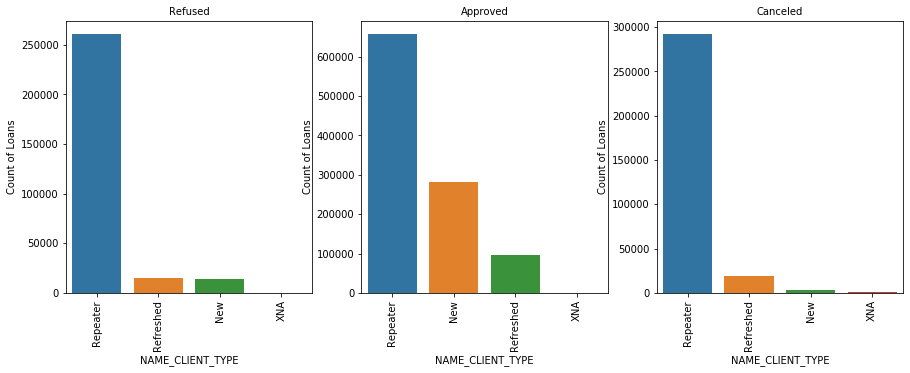

In [105]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

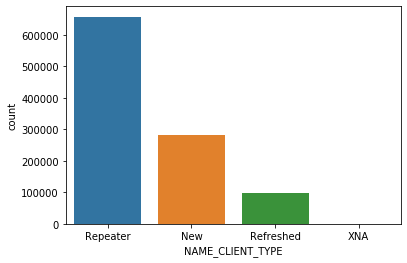

In [106]:


sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=previous_data)



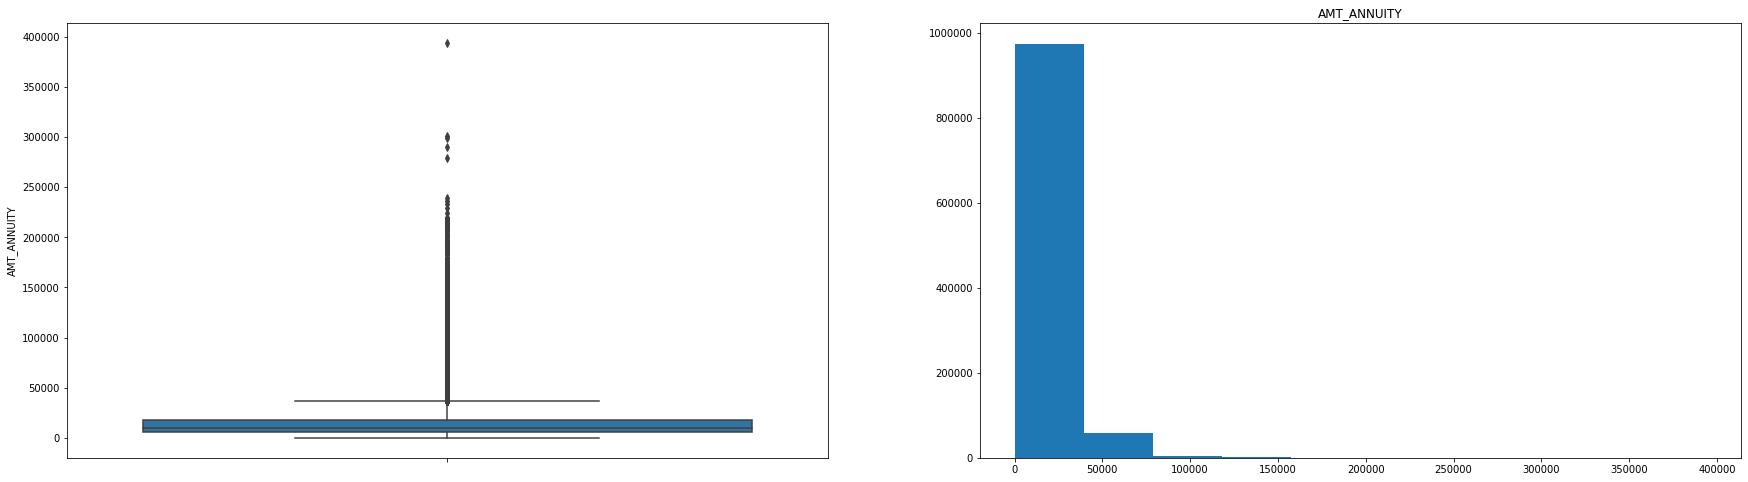

In [107]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

Text(0.5, 1.0, 'AMT_ANNUITY')

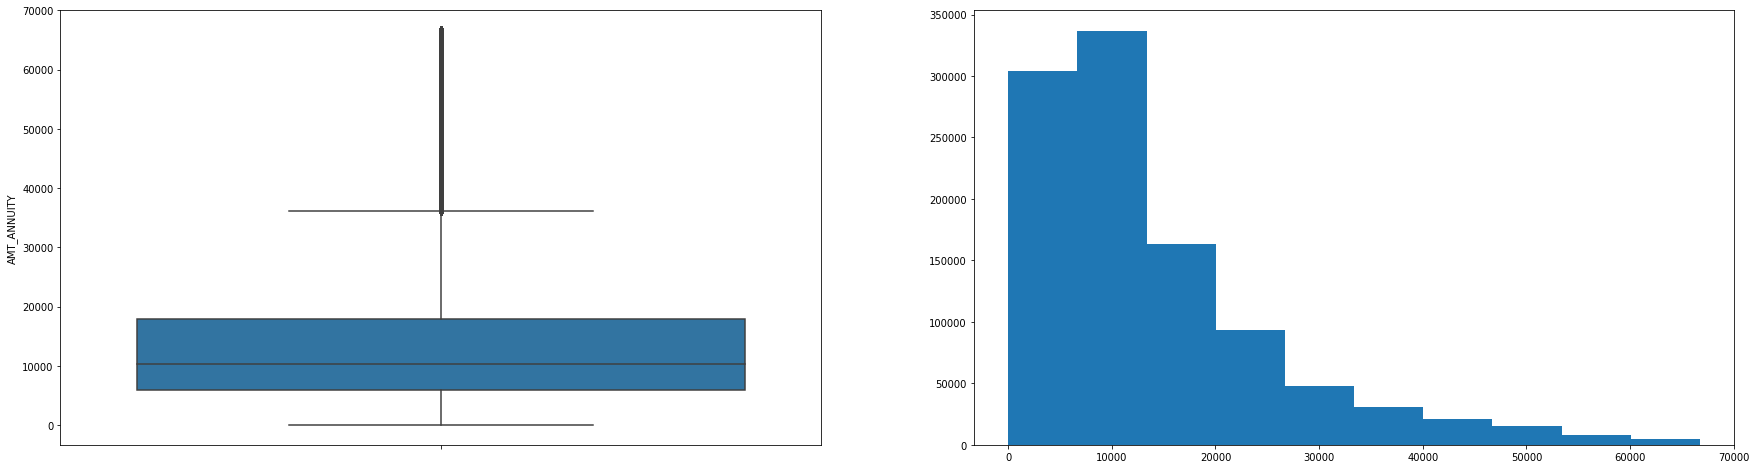

In [108]:
approved=approved[approved.AMT_ANNUITY<np.nanpercentile(approved['AMT_ANNUITY'], 99)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')

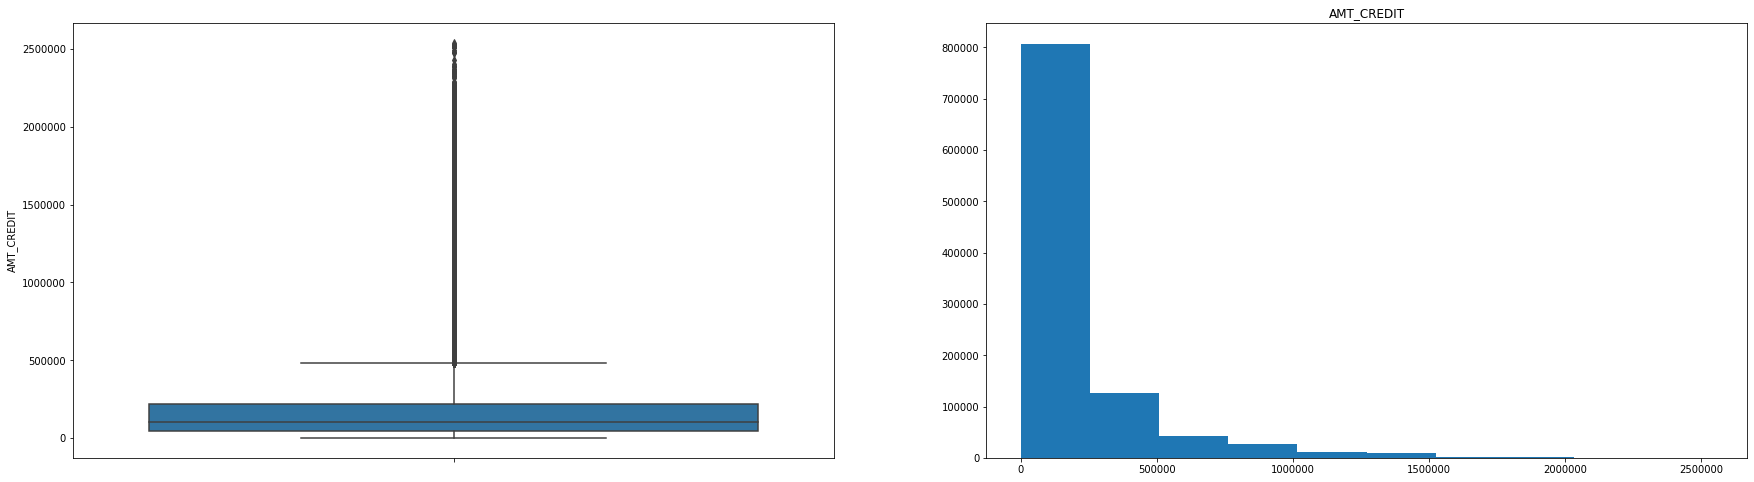

In [109]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT')

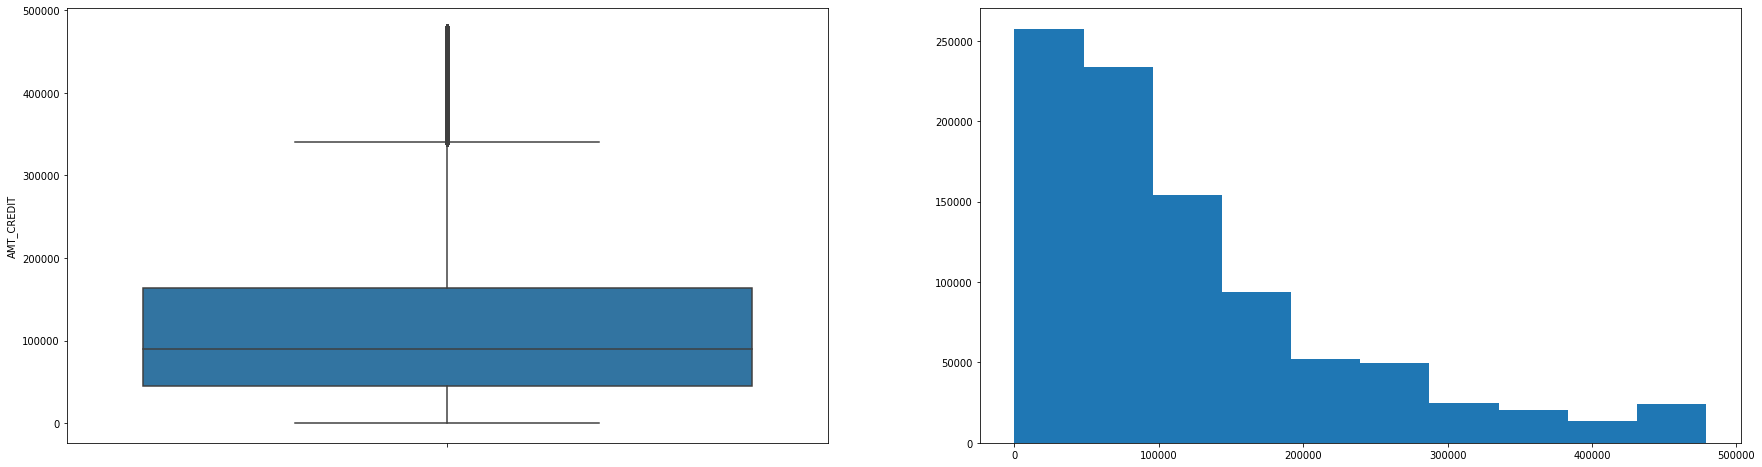

In [110]:
approved=approved[approved.AMT_CREDIT<np.nanpercentile(approved['AMT_CREDIT'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

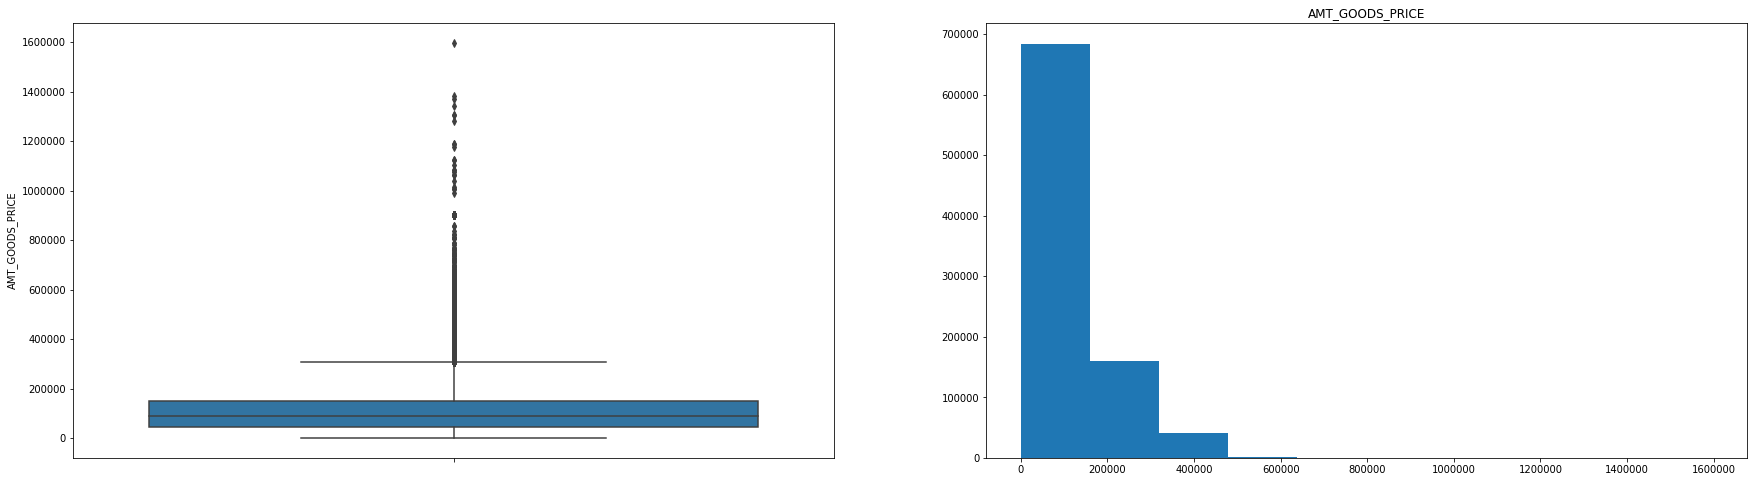

In [111]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

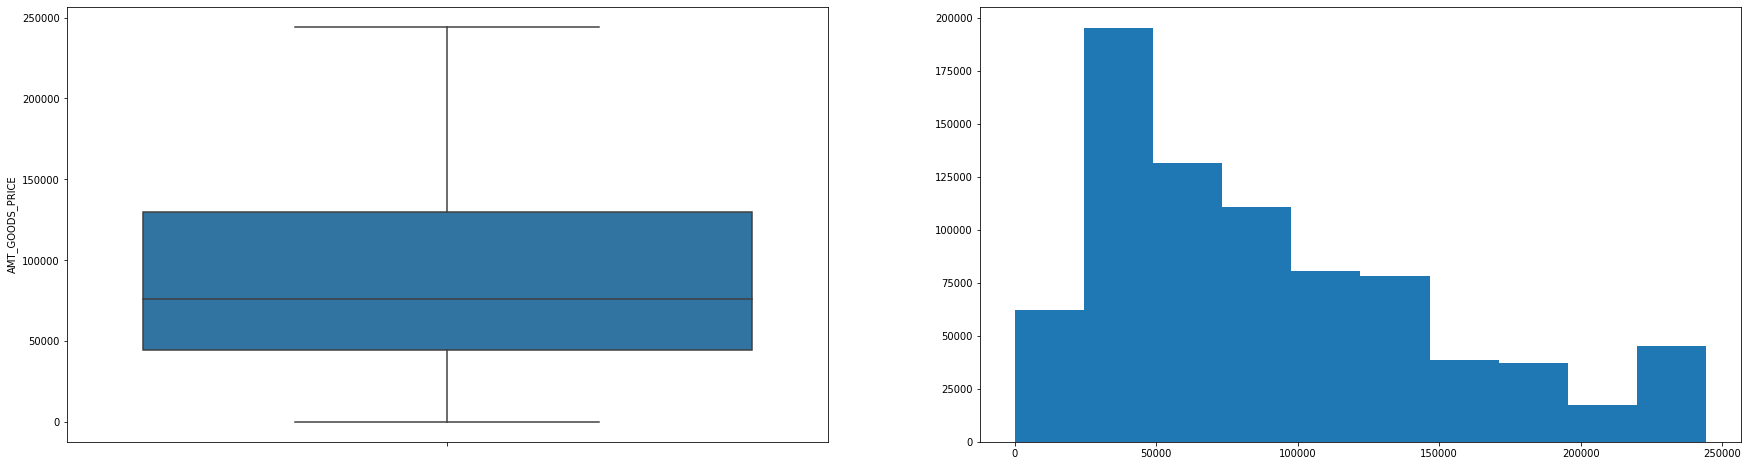

In [112]:
approved=approved[approved.AMT_GOODS_PRICE<np.nanpercentile(approved['AMT_GOODS_PRICE'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')

In [113]:

#BIVARIATE ANALYSIS OF VARIABLES

cols_approved=['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [114]:
cols_refused=[ 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [115]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
DAYS_TERMINATION,1.000,0.964,0.467,0.383,-0.346,0.137,-0.059,0.008,0.153,0.477,0.137
DAYS_LAST_DUE,0.964,1.000,0.470,0.431,-0.307,0.136,-0.062,0.009,0.152,0.478,0.136
DAYS_LAST_DUE_1ST_VERSION,0.467,0.470,1.000,0.580,-0.739,0.002,-0.184,-0.370,0.006,0.231,0.002
DAYS_FIRST_DUE,0.383,0.431,0.580,1.000,-0.040,-0.034,-0.122,-0.220,-0.030,0.222,-0.034
DAYS_FIRST_DRAWING,-0.346,-0.307,-0.739,-0.040,1.000,-0.024,0.126,0.277,-0.025,-0.155,-0.024
AMT_GOODS_PRICE,0.137,0.136,0.002,-0.034,-0.024,1.000,0.746,0.430,0.970,0.241,1.000
AMT_ANNUITY,-0.059,-0.062,-0.184,-0.122,0.126,0.746,1.000,0.029,0.721,0.170,0.746
CNT_PAYMENT,0.008,0.009,-0.370,-0.220,0.277,0.430,0.029,1.000,0.499,0.045,0.430
AMT_CREDIT,0.153,0.152,0.006,-0.030,-0.025,0.970,0.721,0.499,1.000,0.260,0.970
DAYS_DECISION,0.477,0.478,0.231,0.222,-0.155,0.241,0.170,0.045,0.260,1.000,0.241


In [116]:


c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)



AMT_APPLICATION            AMT_APPLICATION              1.000000
                           AMT_CREDIT                   0.969696
DAYS_LAST_DUE              DAYS_TERMINATION             0.964436
AMT_ANNUITY                AMT_GOODS_PRICE              0.746479
                           AMT_CREDIT                   0.721244
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE               0.579953
AMT_CREDIT                 CNT_PAYMENT                  0.498715
DAYS_DECISION              DAYS_LAST_DUE                0.478279
DAYS_TERMINATION           DAYS_DECISION                0.476869
DAYS_LAST_DUE              DAYS_LAST_DUE_1ST_VERSION    0.470444
dtype: float64

In [117]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_TERMINATION           AMT_ANNUITY                 -0.059102
DAYS_LAST_DUE              AMT_ANNUITY                 -0.062083
DAYS_FIRST_DUE             AMT_ANNUITY                 -0.121789
DAYS_DECISION              DAYS_FIRST_DRAWING          -0.154523
AMT_ANNUITY                DAYS_LAST_DUE_1ST_VERSION   -0.184133
CNT_PAYMENT                DAYS_FIRST_DUE              -0.220464
DAYS_LAST_DUE              DAYS_FIRST_DRAWING          -0.306932
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.345834
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT                 -0.370409
                           DAYS_FIRST_DRAWING          -0.739219
dtype: float64

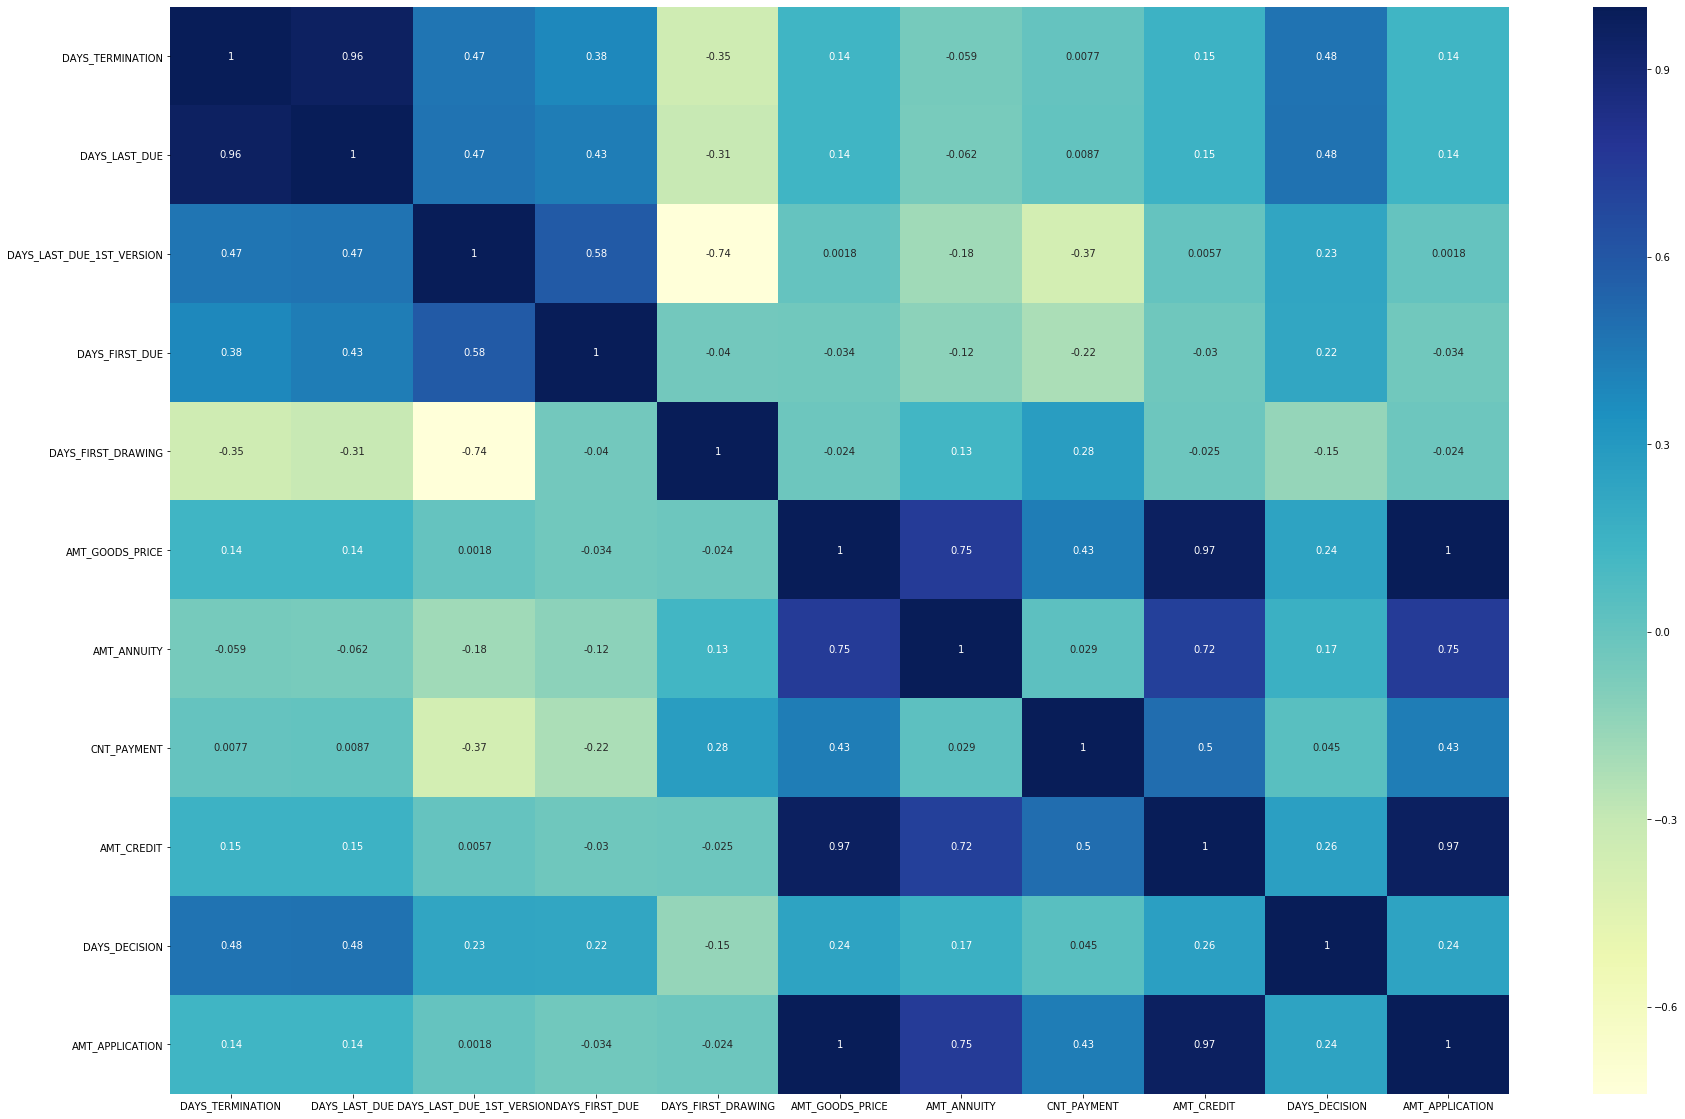

In [118]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
ax=sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [119]:
#calculating correlation for refused
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_GOODS_PRICE,1.000,0.823,0.658,0.992,0.334,1.000
AMT_ANNUITY,0.823,1.000,0.427,0.820,0.287,0.818
CNT_PAYMENT,0.658,0.427,1.000,0.677,0.306,0.670
AMT_CREDIT,0.992,0.820,0.677,1.000,0.270,0.984
DAYS_DECISION,0.334,0.287,0.306,0.270,1.000,0.265
AMT_APPLICATION,1.000,0.818,0.670,0.984,0.265,1.000


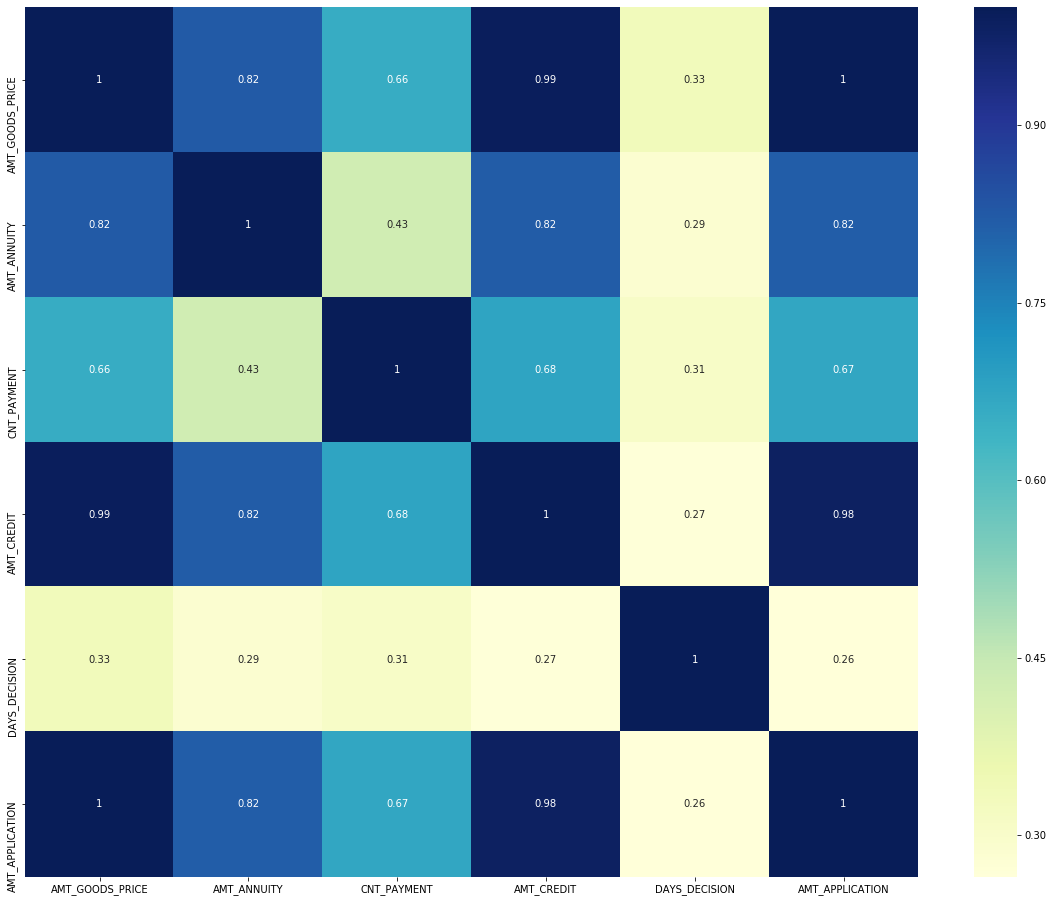

In [120]:
# figure size
plt.figure(figsize=(20,16))

# heatmap
ax=sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [121]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION    1.000000
                 AMT_GOODS_PRICE    0.999699
AMT_GOODS_PRICE  AMT_CREDIT         0.991777
AMT_CREDIT       AMT_APPLICATION    0.983785
AMT_GOODS_PRICE  AMT_ANNUITY        0.822538
AMT_CREDIT       AMT_ANNUITY        0.819867
AMT_APPLICATION  AMT_ANNUITY        0.817869
AMT_CREDIT       CNT_PAYMENT        0.677433
AMT_APPLICATION  CNT_PAYMENT        0.669782
CNT_PAYMENT      AMT_GOODS_PRICE    0.658065
dtype: float64

In [122]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_APPLICATION  AMT_ANNUITY        0.817869
AMT_CREDIT       CNT_PAYMENT        0.677433
AMT_APPLICATION  CNT_PAYMENT        0.669782
CNT_PAYMENT      AMT_GOODS_PRICE    0.658065
                 AMT_ANNUITY        0.427319
DAYS_DECISION    AMT_GOODS_PRICE    0.334064
CNT_PAYMENT      DAYS_DECISION      0.305751
AMT_ANNUITY      DAYS_DECISION      0.286620
AMT_CREDIT       DAYS_DECISION      0.270099
AMT_APPLICATION  DAYS_DECISION      0.264581
dtype: float64

In [123]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated) 

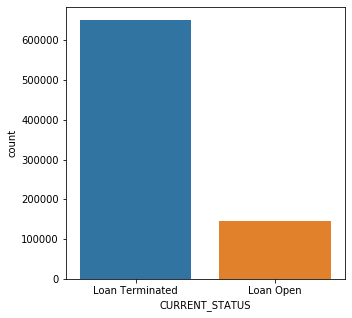

In [124]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [125]:
new_df= previous_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [126]:
merged_df1=pd.merge(new_df, pd.DataFrame(application_data[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [127]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]

In [128]:
merged_df1.head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100002,1,1
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0


In [129]:
merged_df1[merged_df1['TARGET']==0].head()

,SK_ID_CURR,Count of Refused Loans,TARGET
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0
5,100008,5,0


In [130]:
merged_df1[merged_df1['TARGET']==0]

,SK_ID_CURR,Count of Refused Loans,TARGET
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0
5,100008,5,0
...,...,...,...
291051,456249,2,0
291052,456251,1,0
291053,456252,1,0
291054,456253,2,0


In [131]:
new_df=pd.merge(left=application_data,right=previous_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [132]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [133]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

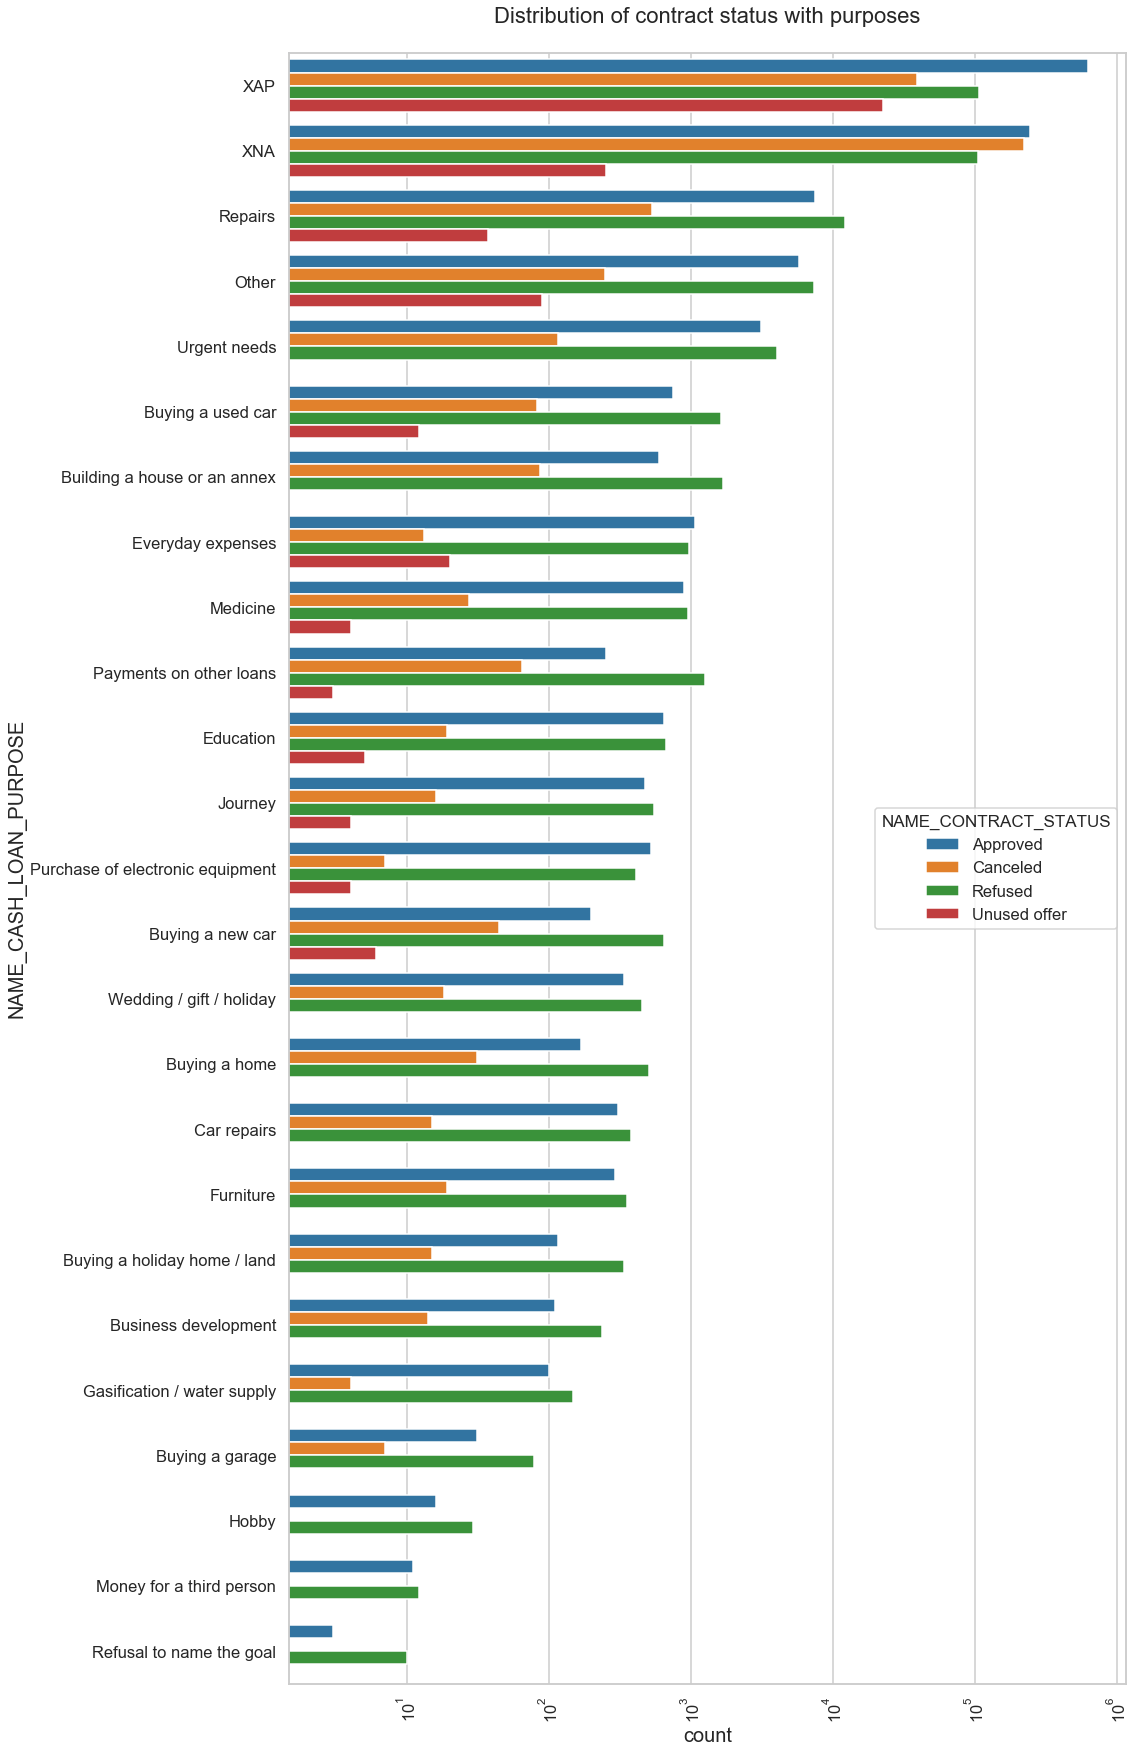

In [134]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

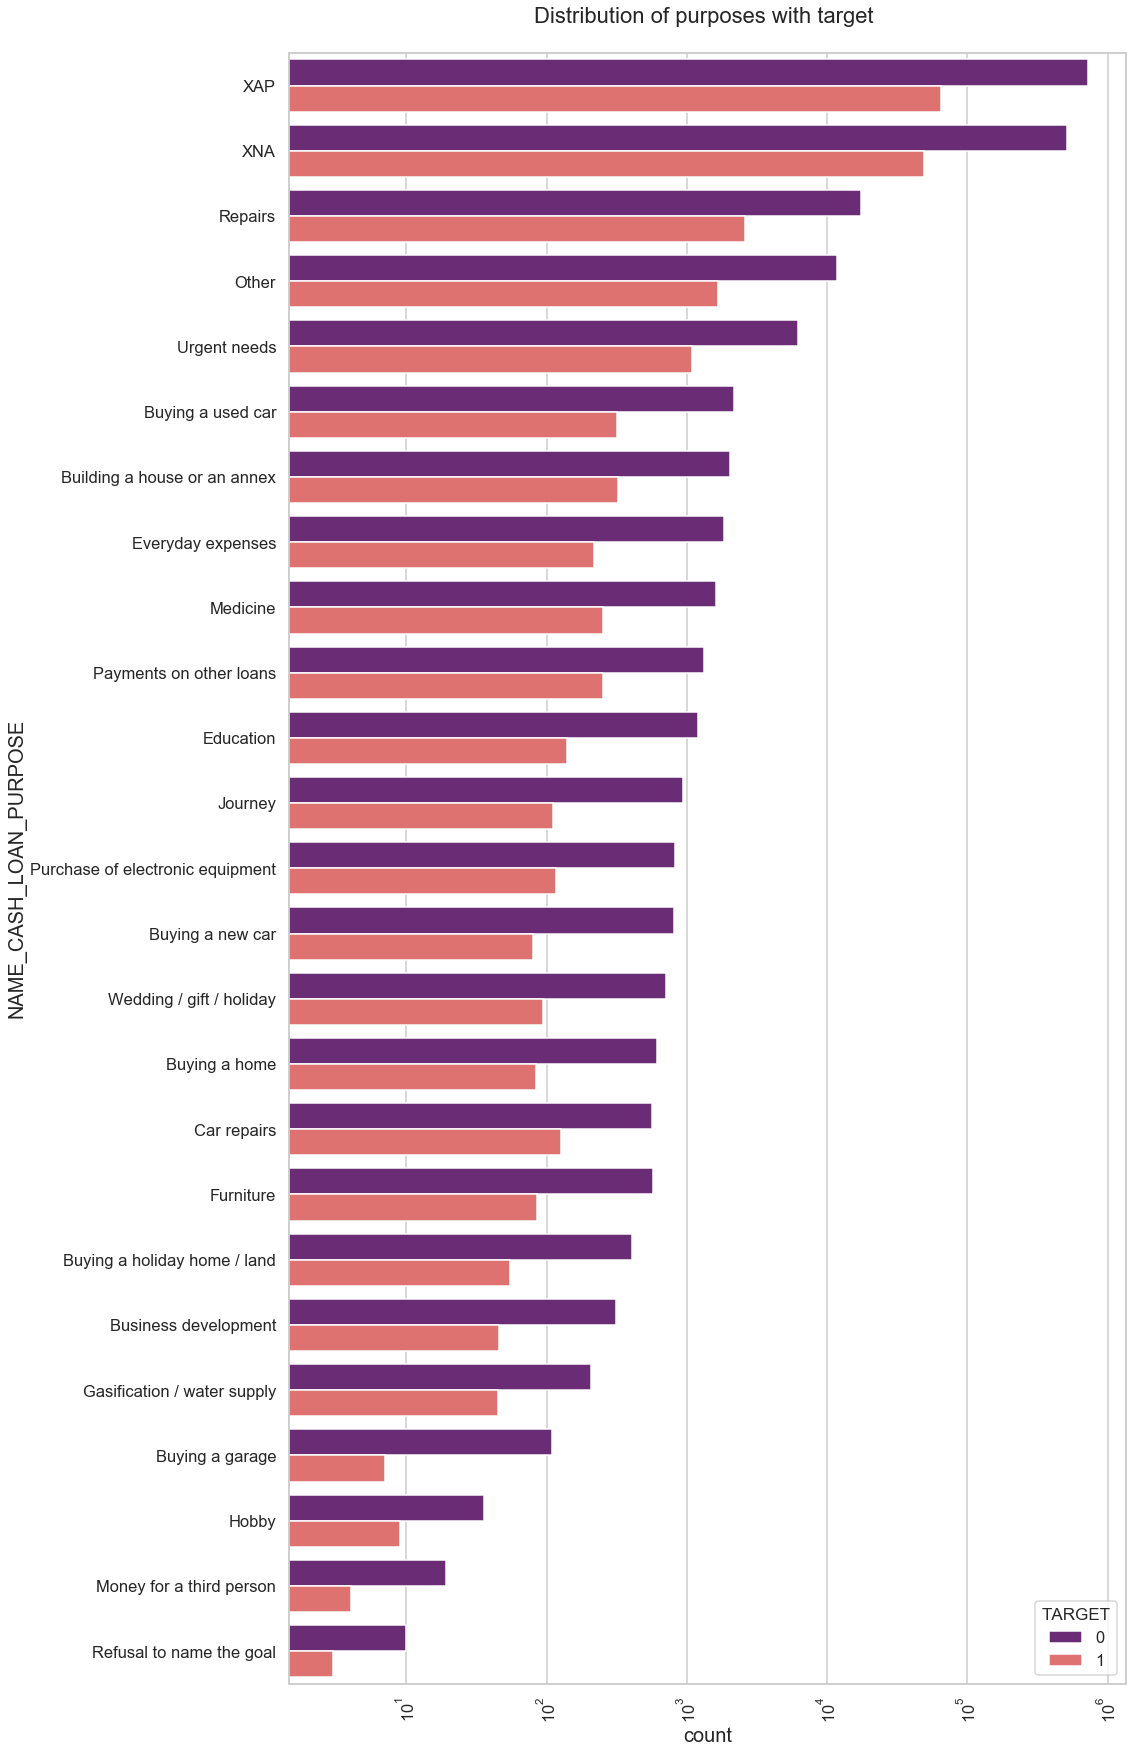

In [135]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

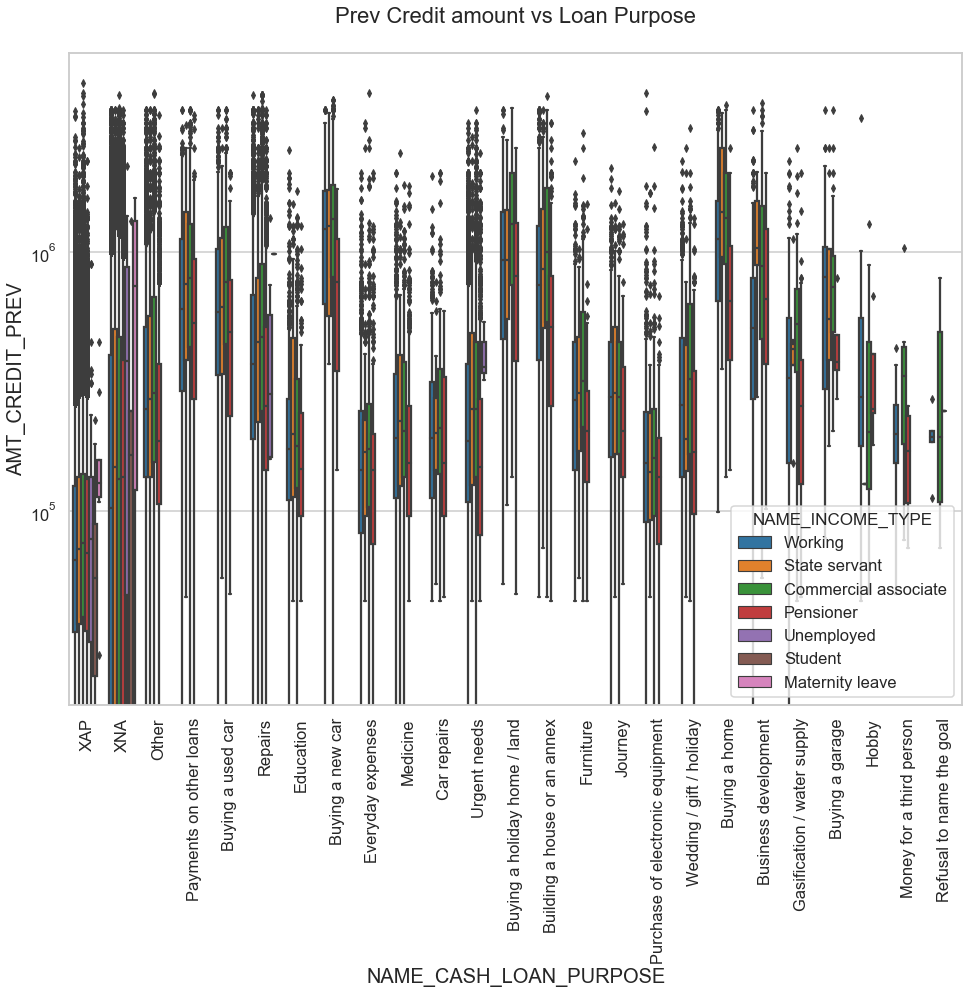

In [136]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

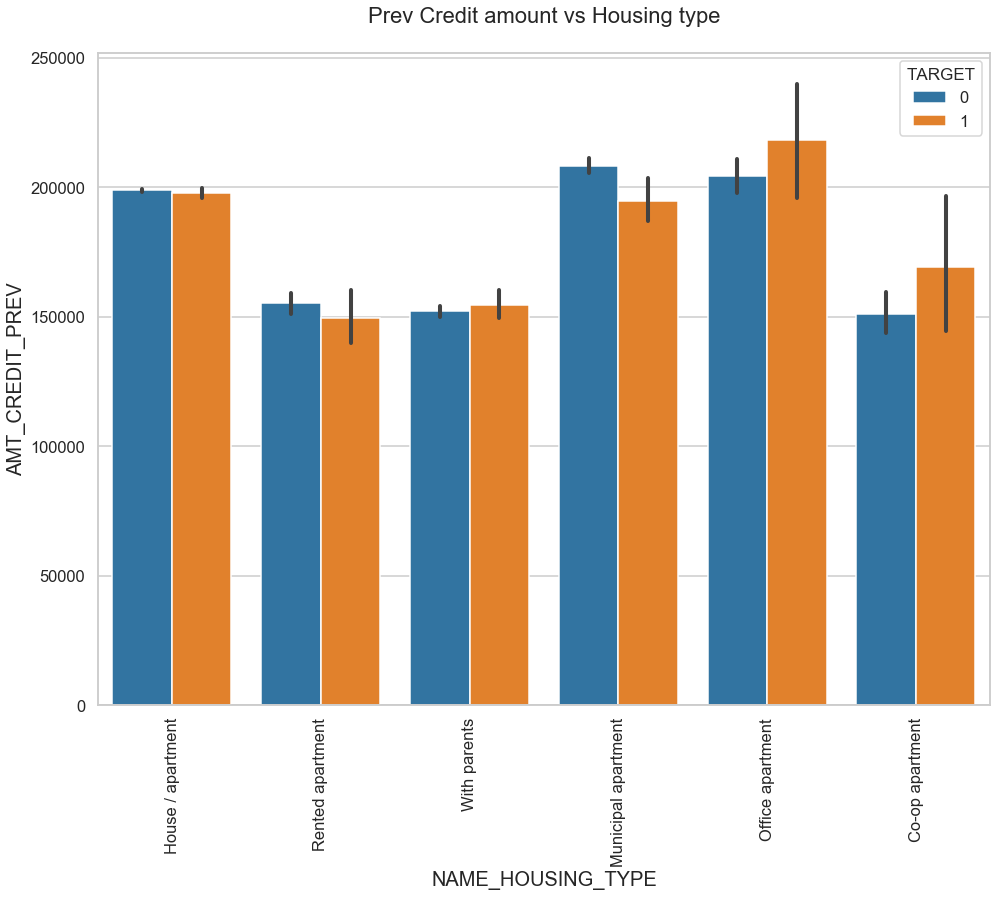

In [137]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

# Observations:

1.we observe that the credit amount lies between 250000 to around 500000 for defaulters.

2.Maximum Failure to Repay is in Age Group 20-25.

3.This tell us that most people with payment have incomes in the lower range between 100000 to 200000 which some on the higher end some on the lower.

4.We see that number of females taking loans is higher than males.

5.It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties.

6.Most people live in a House/Apartment.

7.Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.

8.People with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

9.Most number of refused loans were of Cash X-Sell: Low Product combination.Most Canceled loans were Cash loans.

10.We observe most number of loans were approved for POS household with interest.

11.Most refused loans were from Yield Groups Not specified.

12.Most approved loans were from Middle Yield Group.

13.Most approved loans were POS.Most refused loans were Cash.

# Conclusions:

1.Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2.Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3.Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4.Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.

5.From the above we can conclude some points-

6.The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

7.Income type of state servants have a significant amount of credit applied
    Money for third person or a Hobby is having less credits applied for.

8.There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

9.Payign other loans and buying a new car is having significant higher rejection than approves.
